<h1>Diabetes Predictor
</h1>

<h3>Data Import</h3>

In [135]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

df=pd.read_csv('.\data\Diabetes\DiabetesData.csv')
df.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<h3>Null Value Checking</h3>

In [136]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<h3>Missing Value Checking</h3>

In [137]:
def count_the_missing_values_of_each_column(df):
    missing_values_series = df.isnull().sum()
    return missing_values_series
    
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


<h3>Duplicate Checking</h3>

In [138]:
print(df.duplicated().sum())
df=df.drop_duplicates()

23899


<h3>Outlier removal</h3>

<p>As seen previously in the table describing our features, we have a max value of 99 for BMI. That means there are potential outliers in our dataset with regards to BMI. BMI is a range from 0 to 99.99 officially but very few people actually exist in the higher ranges above 50. While our dataset is coming from the US which makes these people probable, they are not representative of the general population.</p>

In [139]:
df=df.drop(df[df.BMI>66].index)
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,...,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000
mean,0.325638,0.454518,0.441866,0.959506,28.544579,0.465821,0.044788,0.103293,0.733504,0.613173,...,0.946139,0.092811,2.601059,3.504556,4.673223,0.185342,0.439126,8.090314,4.980296,5.890331
std,0.724633,0.497928,0.496610,0.197116,6.233600,0.498831,0.206840,0.304342,0.442128,0.487024,...,0.225744,0.290168,1.064385,7.712810,9.043767,0.388576,0.496282,3.093316,0.992815,2.092098
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [140]:
df.shape

(229144, 22)

<h3>Class Renaming</h3>

In [141]:
df['Diabetes']=df['Diabetes_012']
df.drop(columns='Diabetes_012', inplace=True)

In [142]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [143]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
count,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,...,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000,229144.000000
mean,0.454518,0.441866,0.959506,28.544579,0.465821,0.044788,0.103293,0.733504,0.613173,0.794841,...,0.092811,2.601059,3.504556,4.673223,0.185342,0.439126,8.090314,4.980296,5.890331,0.325638
std,0.497928,0.496610,0.197116,6.233600,0.498831,0.206840,0.304342,0.442128,0.487024,0.403819,...,0.290168,1.064385,7.712810,9.043767,0.388576,0.496282,3.093316,0.992815,2.092098,0.724633
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,2.000000


<h3>Data Visualization</h3>

<h4>Data Visualization of Classification Feature</h4>

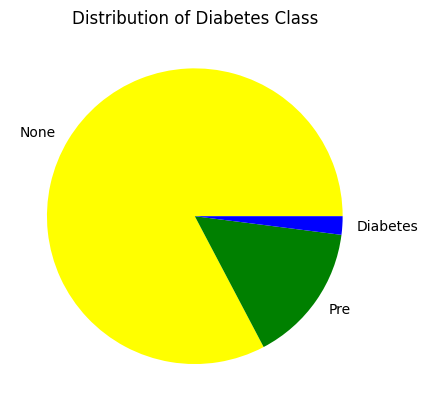

Diabetes
0.0    82.710872
2.0    15.274674
1.0     2.014454
Name: proportion, dtype: float64

In [144]:
plt.pie(df['Diabetes'].value_counts(),labels=['None','Pre','Diabetes'], colors=['yellow','green','blue'])
plt.title('Distribution of Diabetes Class')
plt.show()
df['Diabetes'].value_counts(normalize=True) * 100

<p>Our dataset's is 84% no diabetes, 2% prediabetes and 15% diabetes. This is consistent with actual estimations.</p>
<p>However for our model training, this will create a bias in our models. Given the low positive classifications, (here we are treating 1 and 2 as positive classifications) our model will be able to accurately predict non positive results better than positive results.</p>

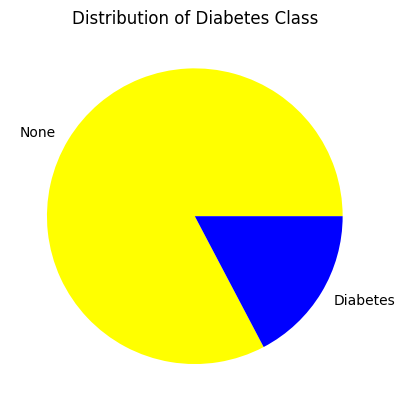

Diabetes
0    82.710872
1    17.289128
Name: proportion, dtype: float64

In [199]:
df1=df
df1[df1['Diabetes']==2]=1
plt.pie(df1['Diabetes'].value_counts(),labels=['None','Diabetes'], colors=['yellow','blue'])
plt.title('Distribution of Diabetes Class')
plt.show()
df1['Diabetes'].value_counts(normalize=True) * 100

<h4>Data Visualization of Categorical Features</h4>

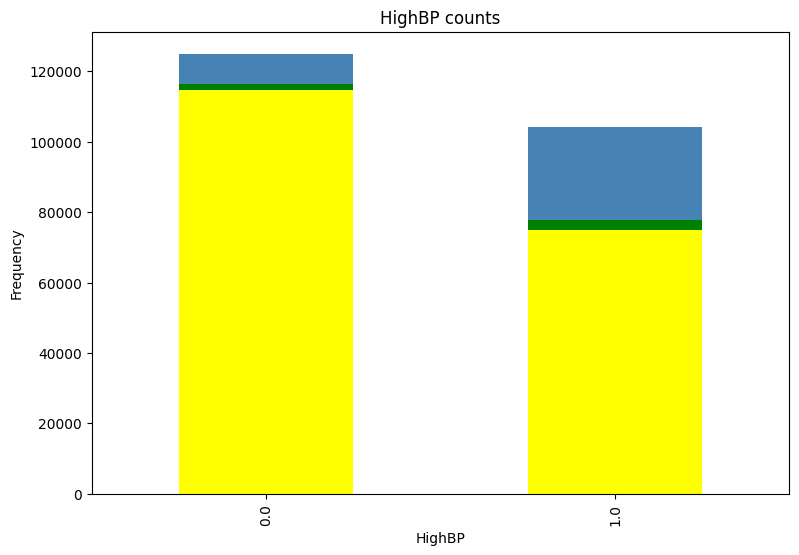

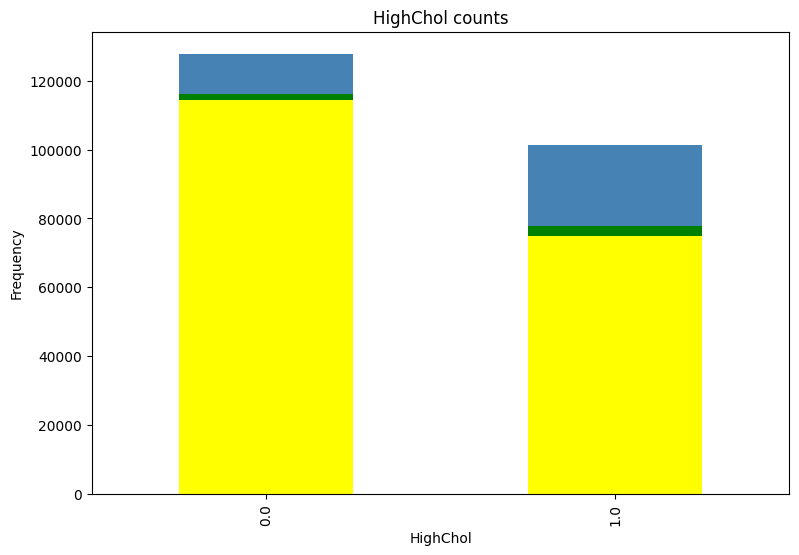

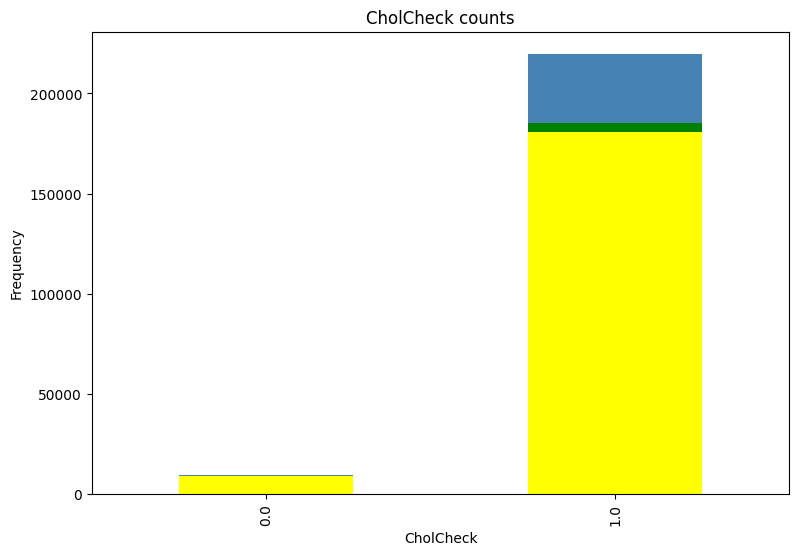

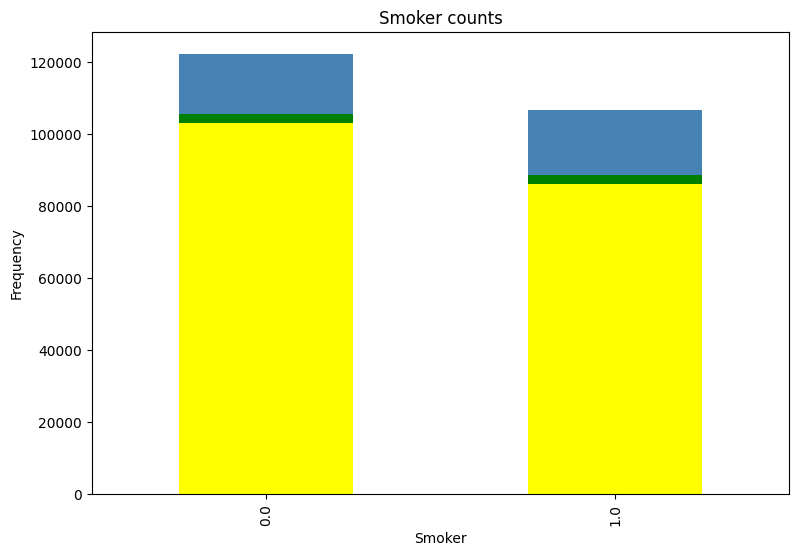

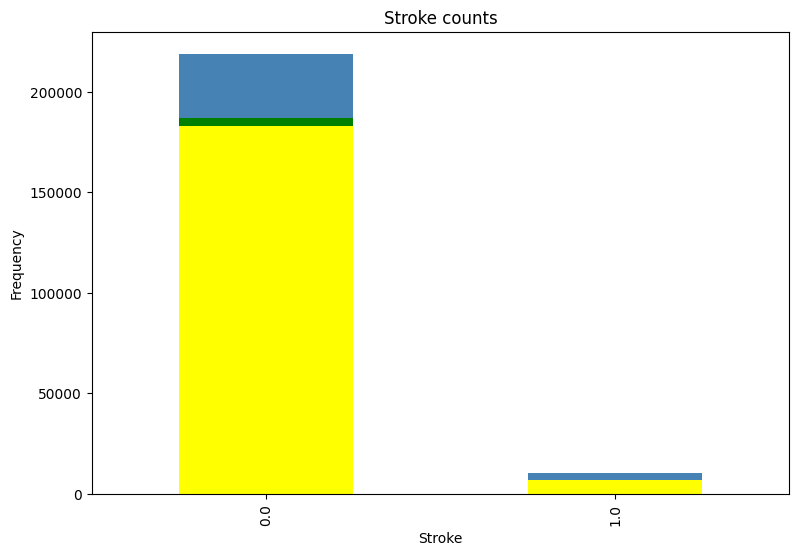

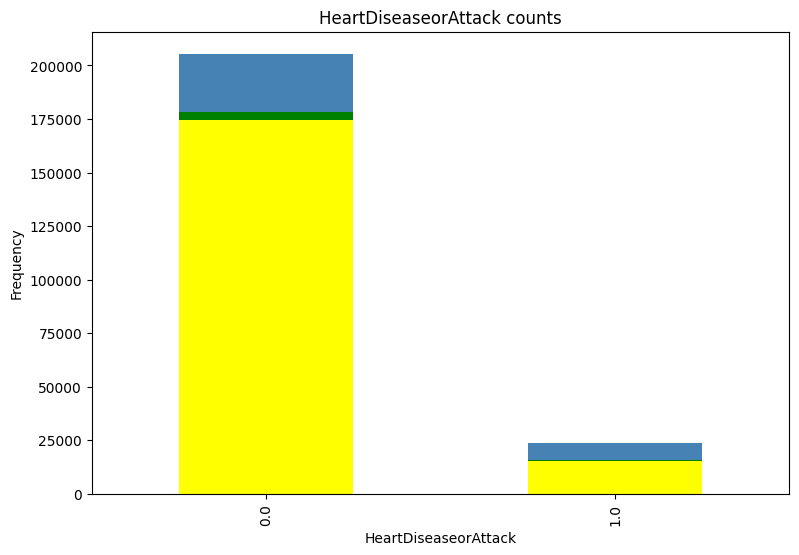

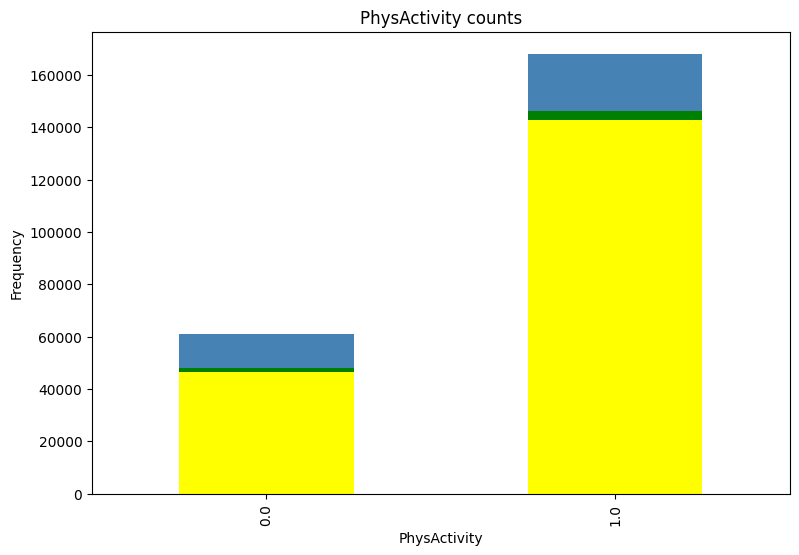

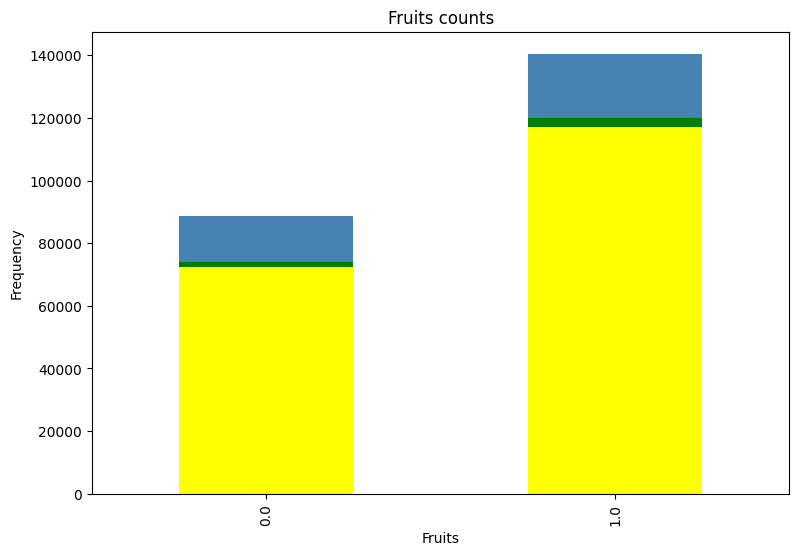

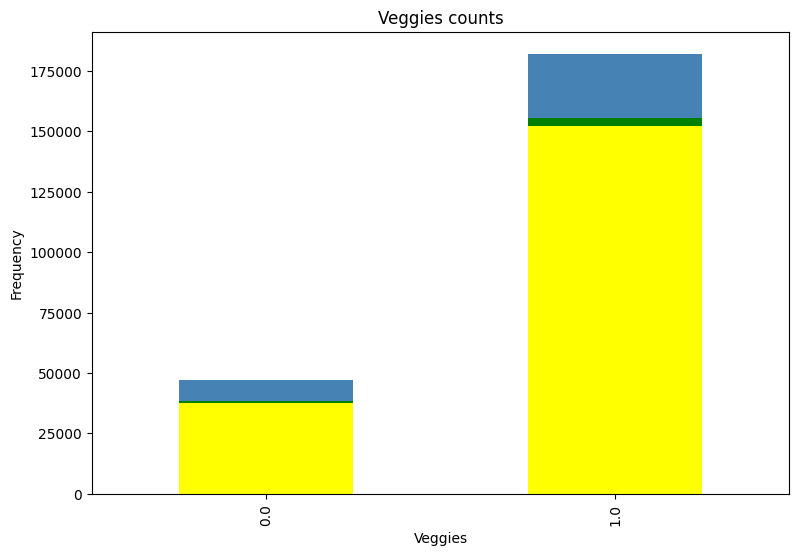

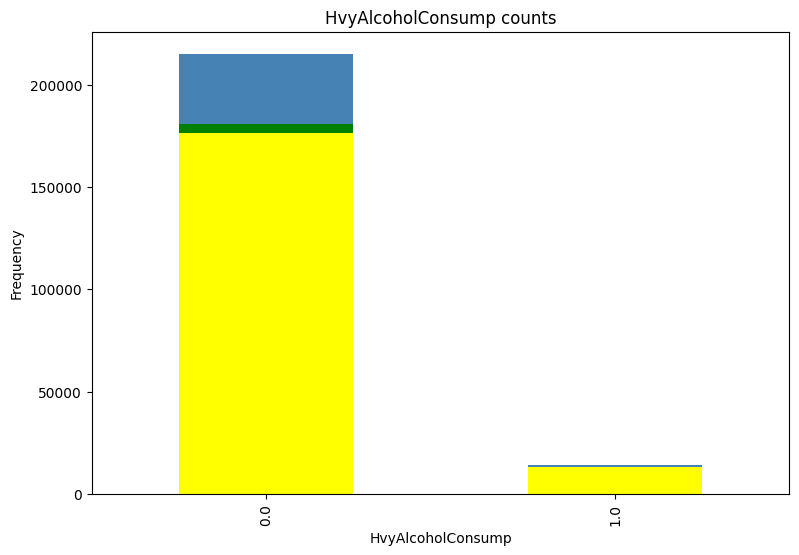

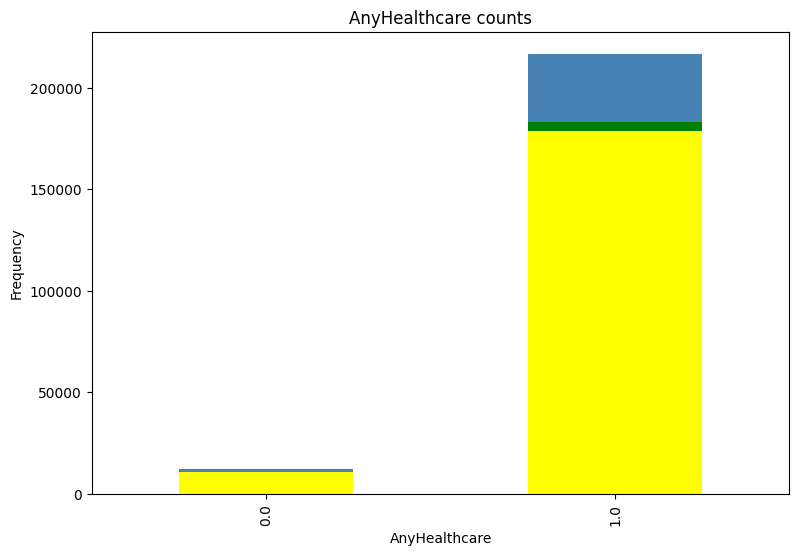

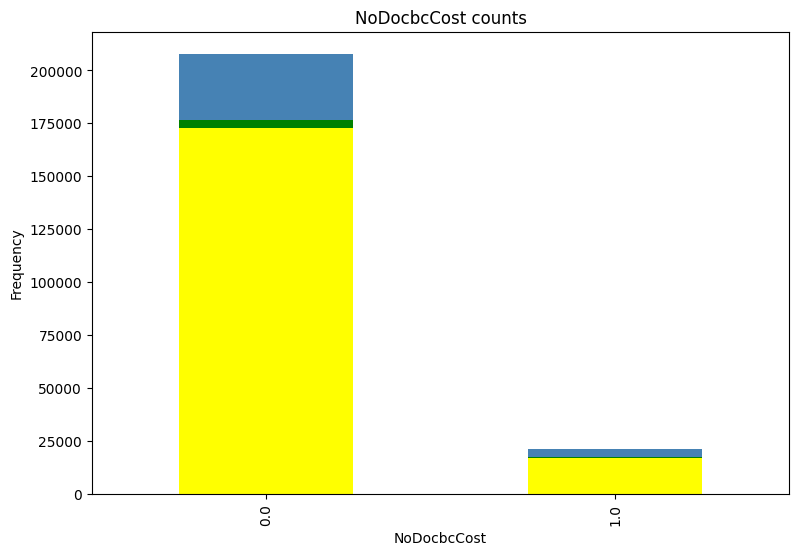

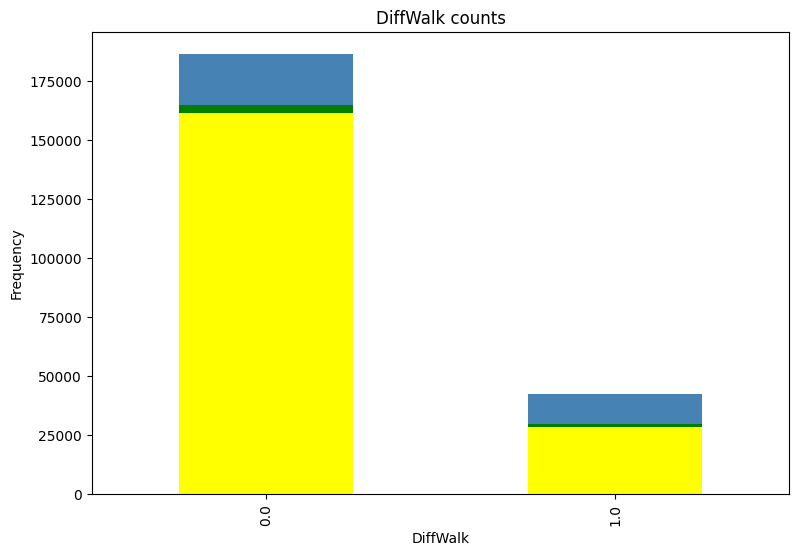

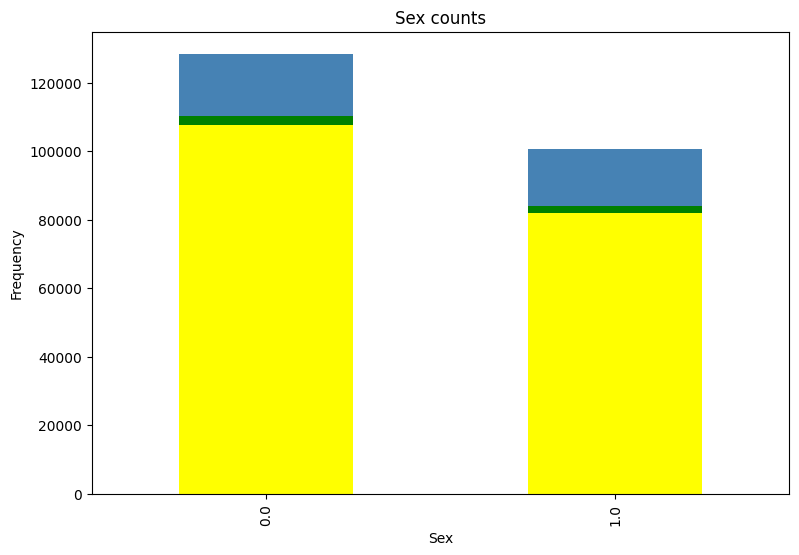

In [145]:
def plot_barchart(df, col): 
    
    negative_counts=df[col][df['Diabetes']==0.0].groupby(df[col]).count()
    pre_counts=df[col][df['Diabetes']==1.0].groupby(df[col]).count()
    positive_counts=df[col][df['Diabetes']==2.0].groupby(df[col]).count()

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    positive_counts.plot.bar(ax = ax, color='steelblue',bottom=pre_counts+negative_counts)
    negative_counts.plot.bar(ax = ax, color='yellow')
    pre_counts.plot.bar(ax = ax, color='green',bottom=negative_counts)

    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']


for col in categorical_features:
    plot_barchart(df, col)

<p>The distribution of our features for our categorical variables are not even. Some are skewed and some are close to even. This is good as our data is very real.</p>

<h4>Data Visualization of Numerical Features</h4>

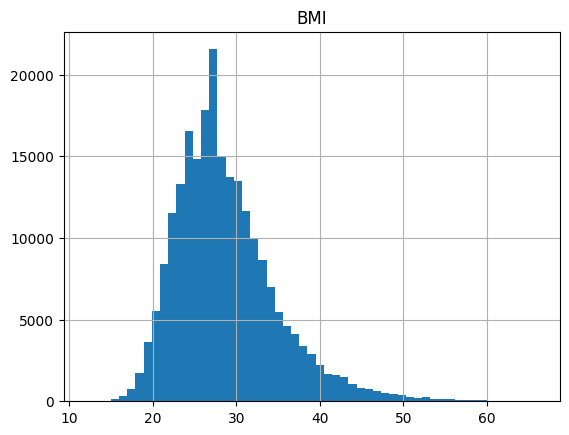

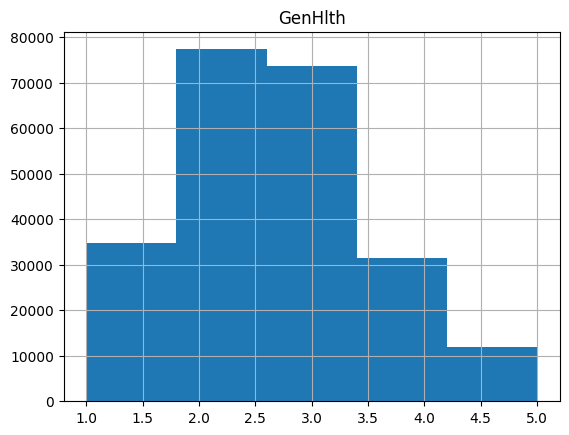

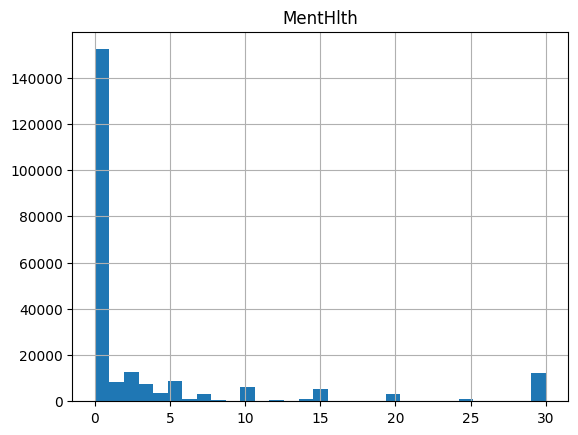

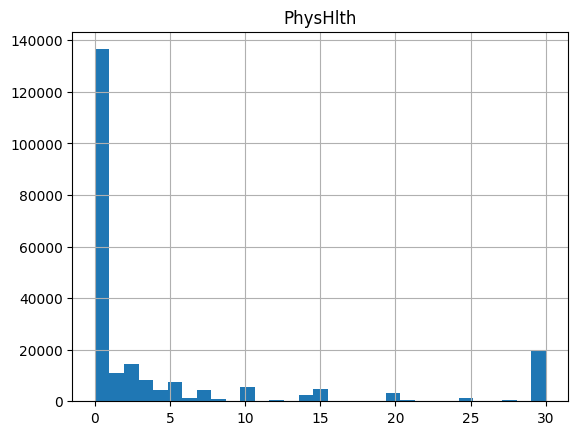

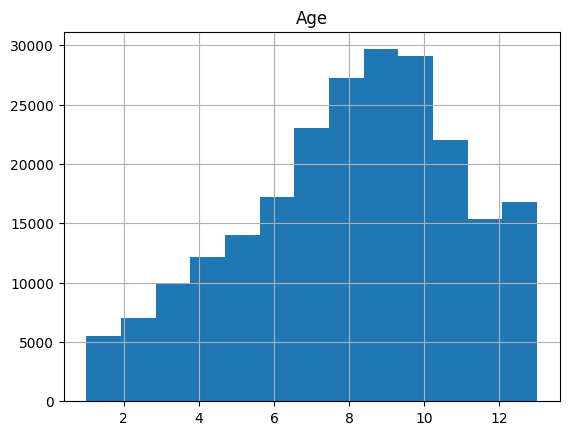

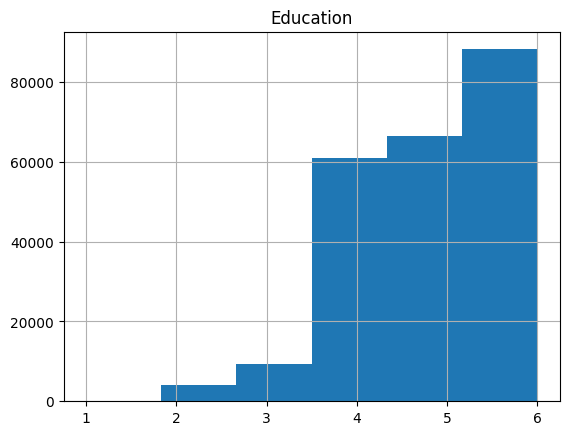

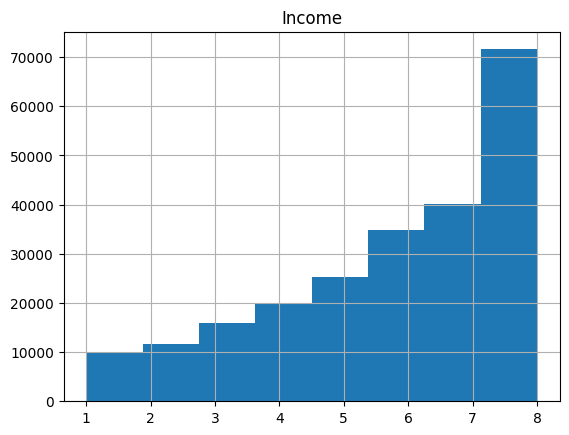

In [146]:
def plot_histogram(df, col): 
    bincount=df[col].unique().size
    ax = df.hist(column=col,bins=bincount) 
    
ordinal_features = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']


for col in ordinal_features:
    plot_histogram(df,col)

<p>As for our numeric features, which have intervals, the distribution is skewed for all of them. This may be a problem as it will influence our models to predict for those who fit the skew.</p>

<h3>Correlation Analysis</h3>

<Axes: >

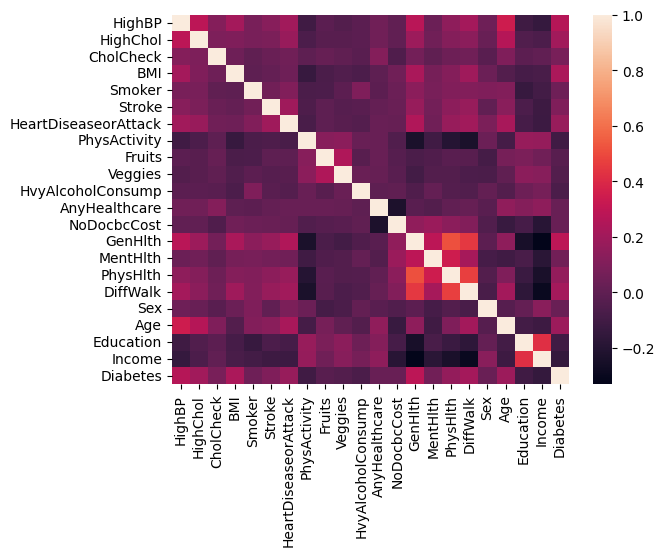

In [147]:
import seaborn as sns
sns.heatmap(df.corr())

<p>Most features do not have a strong correlation with each other. There are some, like GenHlth, PhysHlth, MentHlth that have a strong positive correlation with each other. In addition to Income and Education.</p>

<h3>Model Training</h3>

In [148]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier # Import Random Tree Classifier

In [149]:
def separate_features_from_label_and_split_the_data(df, features, label, test_size, random_state=0):
    #Convert prediabetes to diabetes classification. As Prediabetes is a stage before full-on diabetes, it is just as important as Diabetes.
    df[df['Diabetes']==2]=1

    # Separate features from label
    X, y = df[features], df[label]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    return X_train, X_test, y_train, y_test


features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
label='Diabetes'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


positive=(y_test==1)
print("Positive Diabetes classes:",positive.sum())
negative=(y_test==0)
print("Negative Diabetes classes:",negative.sum())

Training cases: 160400
Test cases: 68744
Positive Diabetes classes: 11996
Negative Diabetes classes: 56748


<p>Reusable Functions</p>

In [150]:
#Reusable functions to display model information.
def displaytrees(storedtree):
    #If the tree is too big, it can't be plotted.
    if not(storedtree.tree_.max_depth>10 or storedtree.tree_.node_count>40):
        fig = plt.subplots(figsize=(21, 8))
        tree.plot_tree(storedtree)
        plt.show()
    print ("The tree's max depth is: ", storedtree.tree_.max_depth," and it has ", storedtree.tree_.node_count, " nodes.")

def displayfeatureimportance(model):
    #For each model type, the variables are different.
    if (isinstance(model,linear_model.LinearRegression)):
        importance=model.coef_
        features=model.feature_names_in_
        print("The multiple linear regression model's intercept is: ",model.intercept_)
    elif (isinstance(model,linear_model.LogisticRegression)):
        importance=model.coef_
        importance=importance.flatten()
        features=model.feature_names_in_
        print("The logistic regression model's intercept is: ",model.intercept_)
    elif (isinstance(model, tree.DecisionTreeClassifier)):
        importance=model.feature_importances_
        features=model.feature_names_in_
    # summarize feature importance
    for i,v in enumerate(importance):
        if not (v.round(6)==0):
            print('Feature '+str(i)+":  "+features[i]+' Score: '+str(v.round(6)))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
def displayCM(cm , model):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()


def evaluatemodel(predictions,model):
    cm = confusion_matrix(y_test,predictions)
    displayCM(cm,model)
    print('Overall Accuracy was:', accuracy_score(y_test,predictions))
    print("Overall Precision:", precision_score(y_test,predictions))
    print("Overall Recall:", recall_score(y_test,predictions))

<h4>Decision Tree Classifier</h4>
<p>Decision Tree Classifier. It allows for all features. A slight modification has to be done to the data in order for this to work. Diabetes is transformed from a 0 = no diabetes, 1 = prediabetes, 2 =  diabetes, to 0 = no risk of diabetes and 1 = risk of diabetes.</p>

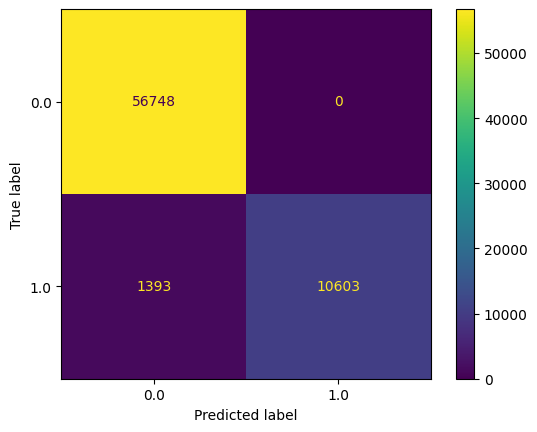

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733


In [152]:
firstdt=DecisionTreeClassifier(criterion="gini",max_depth=5,max_features=20)
firstdt.fit(X_train,y_train)
predictions = firstdt.predict(X_test)    

evaluatemodel(predictions,firstdt)

<p>Confusion Matrix: It is flipped. According to the CM, my decision tree is predicting 100% (or close to) of the True Negatives, and only 88% True Positives. Recall is the measure we will focus on as what we want is a model that diagnoses risk of diabetes, </p>
<p>88% Recall is a good measurement as our classes are skewed towards negative classes than positive classes.</p>

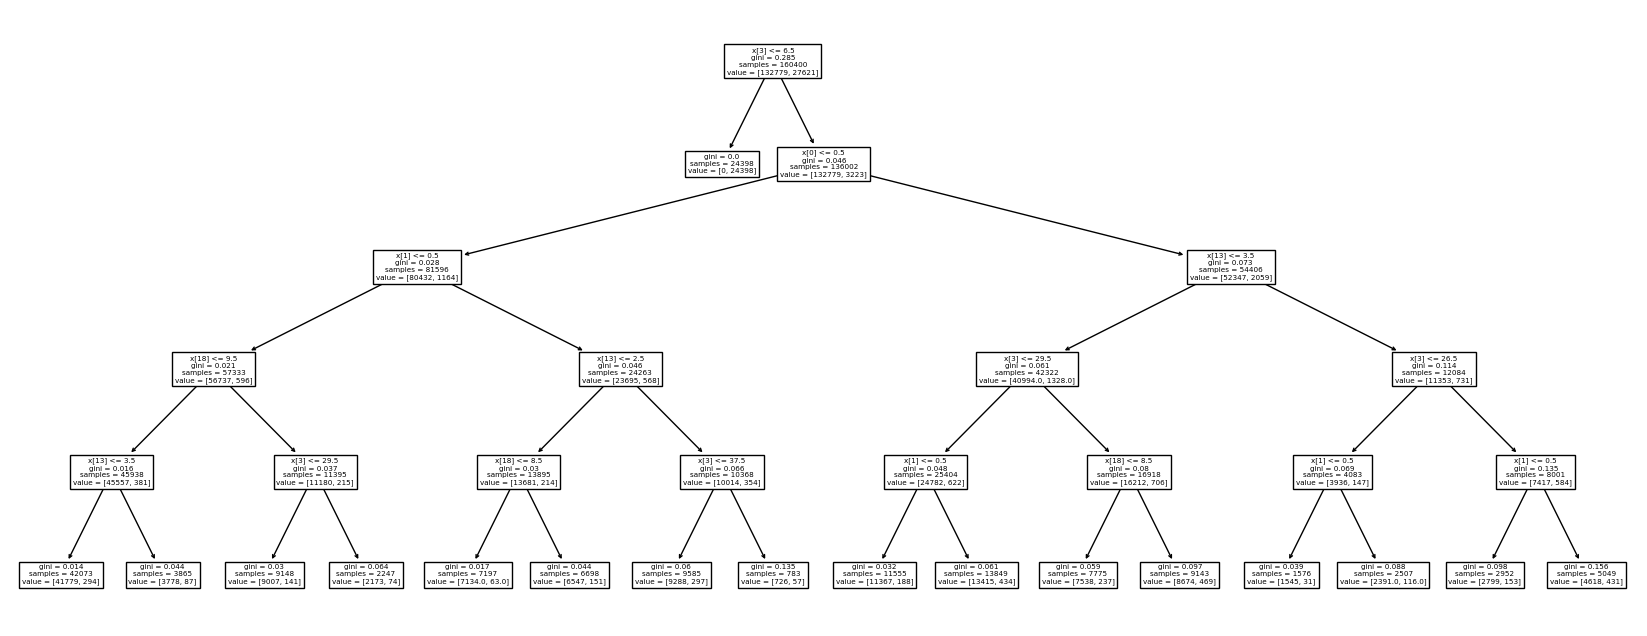

The tree's max depth is:  5  and it has  33  nodes.
Feature 0:  HighBP Score: 0.000918
Feature 1:  HighChol Score: 0.000359
Feature 3:  BMI Score: 0.997994
Feature 13:  GenHlth Score: 0.000552
Feature 18:  Age Score: 0.000177


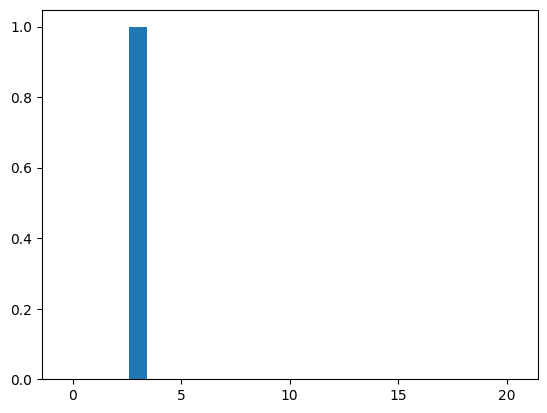

In [153]:
#display initial tree and its feature importance
displaytrees(firstdt)
displayfeatureimportance(firstdt)

<p>Fig: The actual decision tree, visualized and its features importance ranked.</p>
<p>Here we can see that the first decision tree uses BMI as its main splitting feature. What this is telling us that BMI is the biggest indicator of whether or not someone has risk of diabetes. The higher the BMI, the more likely one is to have diabetes.</p>
<p>In real life, we know that this is correlated. There are many studies that show that individuals with higher BMI have diabetes more than people with normal BMI. However, this is not causation but correlation. Individuals with high BMI are likely to have unhealthy eating habits which causes diabetes. In summary, BMI tells us about an individual's eating habits and possibly genetics, which in turn causes diabetes development.</p>
<p>The other used features for splitting are HighBP, HighChol, GenHlth, and Age. All of which are correlated with a person's BMI but not direct causes of diabetes development. </p>
<p>HighBP and HighChol are things that are expected to happen when one's BMI is outside of the healthy range. <br>GenHlth is an indicator of one's living environment and commitment to personal health. <br>Age is independent of the other features.</p>

<h5> Cross Validation</h5>

In [193]:
from sklearn.model_selection import cross_validate
scoring=['accuracy','precision','recall']
scores = cross_validate(firstdt, X_train, y_train, cv=5,scoring=scoring)
for x in scoring:
    string="test_"+x
    print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

0.98 accuracy  with a standard deviation of  0.0
1.0 precision  with a standard deviation of  0.0
0.883 recall  with a standard deviation of  0.002


<p>Cross validation tells us that no matter how many times we train the model on this dataset, it will end up the same with negligible deviation.</p>

<h4>Random Forest Classifier</h4>

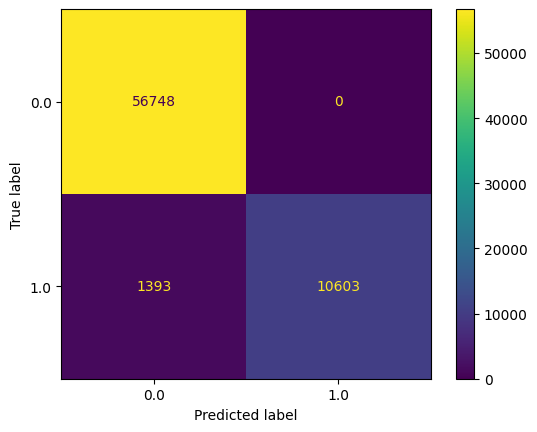

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733


In [194]:
#RANDOM FOREST

randomforest=RandomForestClassifier(criterion="gini",max_depth=10,max_features=20,n_estimators=10)
randomforest=randomforest.fit(X_train,y_train)
predictions = randomforest.predict(X_test)
evaluatemodel(predictions,randomforest)

<p>The Random Forest Classification model shows no improvement in Recall, the measure we want to focus on. Instead, we see a drop in accuracy and precision. This likely means that the Random Forest classification algorithm is not particularly suited for our needs. Its complexity shows no improvement, so there is no point in using it.</p>

In [156]:
##Random Forest Tree Plotting

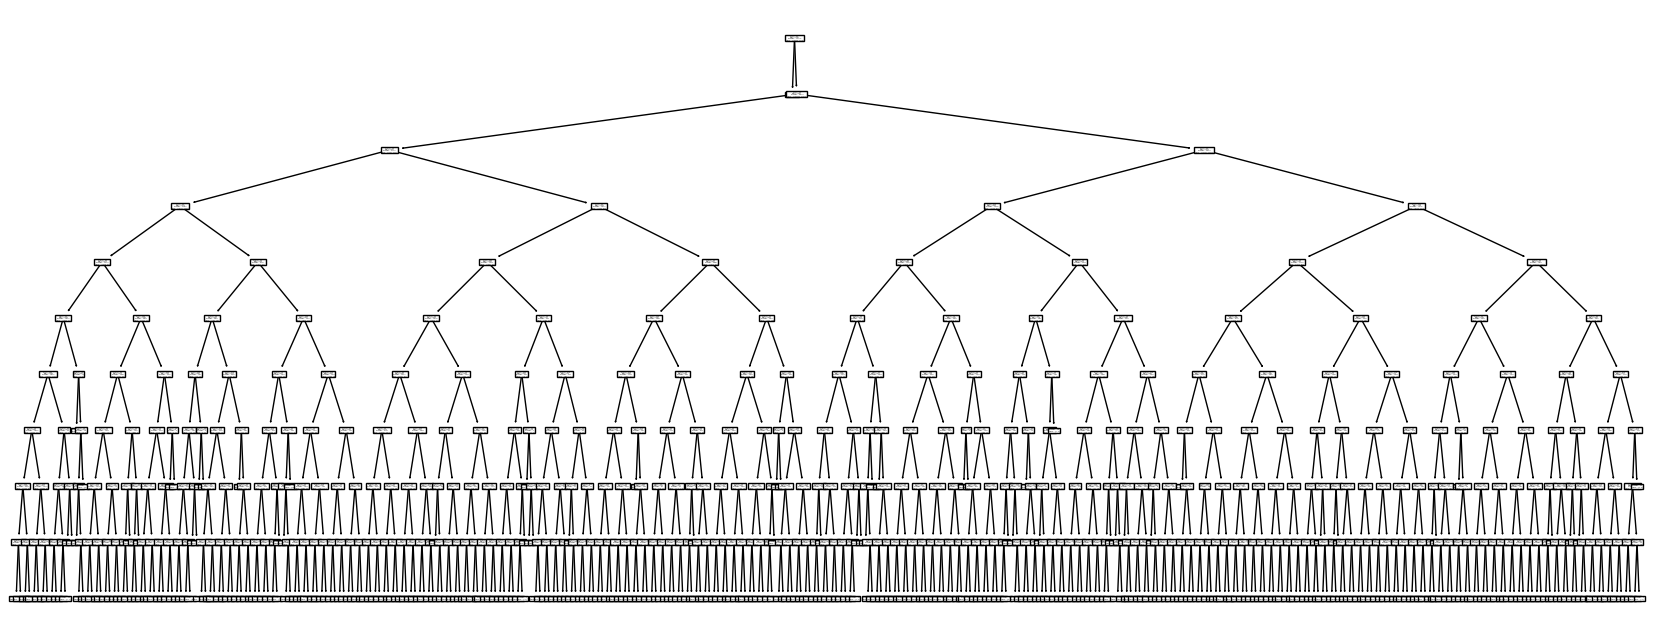

In [157]:
i_tree=0
for tree_in_forest in randomforest.estimators_:
    if (i_tree<1):
        fig = plt.subplots(figsize=(21, 8))
        tree.plot_tree(tree_in_forest)
        i_tree=i_tree+1
plt.show()

<p>Fig: Visualization of the Random Forest model that was generated.</p>

<h5>Cross Validation</h5>

In [158]:
scores = cross_validate(randomforest, X_train, y_train, cv=5,scoring=scoring)
for x in scoring:
    string="test_"+x
    print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

0.98 accuracy  with a standard deviation of  0.0
1.0 precision  with a standard deviation of  0.0
0.883 recall  with a standard deviation of  0.002


<p>The same as the previous cross-validation, we can see that the data is not affecting the evaluation metrics.</p>

<h4>Decision Tree Hyperparameter Tuning</h4>

<p>Hyperparameter tuning with tree depth and runs through 20 times to test for depth.</p>

Highest Accuracy was: 0.9797364133597114  with  1 as its depth


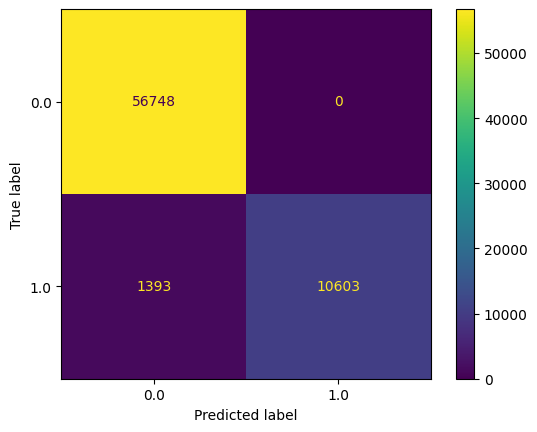

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733
Highest Precision: 1.0  with  1 as its depth


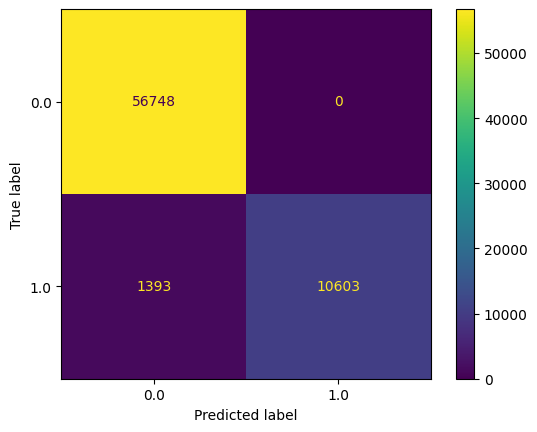

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733
Highest Recall: 0.8891297099033011  with  19 as its depth


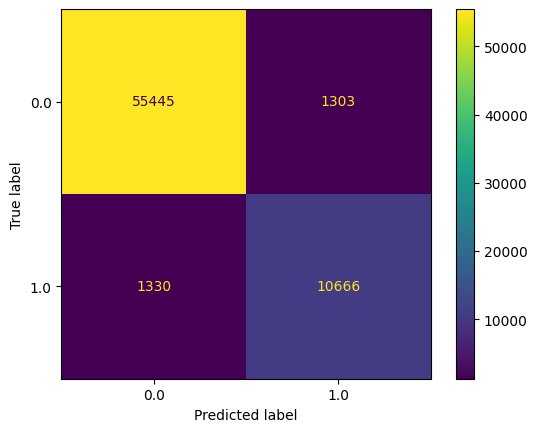

Overall Accuracy was: 0.9616984755033167
Overall Precision: 0.8911354332024396
Overall Recall: 0.8891297099033011


In [159]:
highestascore=0
ascoredepth=0
highestpscore=0
pscoredepth=0
highestrscore=0
rscoredepth=0

for n in range (1,20):
    clf=DecisionTreeClassifier(criterion="gini",max_depth=n,max_features=20)
    clf=clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)    
    cm = confusion_matrix(y_test,predictions)
    ascore=accuracy_score(y_test,predictions)
    pscore=precision_score(y_test,predictions)
    rscore=recall_score(y_test,predictions)
    if ascore>highestascore:
        highestascore=ascore
        ascoredepth=n
        secgendt1=clf
    if pscore>highestpscore:
        highestpscore=pscore
        pscoredepth=n
        secgendt2=clf
    if rscore>highestrscore:
        highestrscore=rscore
        rscoredepth=n
        secgendt3=clf

storedtrees=[secgendt1,secgendt2,secgendt3]
print('Highest Accuracy was:', highestascore,' with ', ascoredepth, 'as its depth')
evaluatemodel(secgendt1.predict(X_test),secgendt1)
print("Highest Precision:", highestpscore,' with ', pscoredepth, 'as its depth')
evaluatemodel(secgendt2.predict(X_test),secgendt2)
print("Highest Recall:", highestrscore,' with ', rscoredepth, 'as its depth')
evaluatemodel(secgendt3.predict(X_test),secgendt3)

<p>Out of the generated decision trees with varying depths from 1 to 20, we selected the best of each measure and stored them.</p><br><p>Result: Accuracy and Precision get worse as tree depth increases. Interesting point: They both use the same feature, BMI for splitting. Its likely that they are the same decision trees but until we visualize them, we won't know for certain. However, this is different for Recall.</p>
<p>As mentioned previously, recall is the measure we want to focus on as we want to correctly predict one's risk of developing diabetes. The decision tree with the best recall goes from 88.7% recall to 89.2% recall. A slight improvement at the cost of simplicity as it has a tree depth of 19. As a result of increasing recall, both accuracy and precision drop, which represents an increase in false positives.</p>

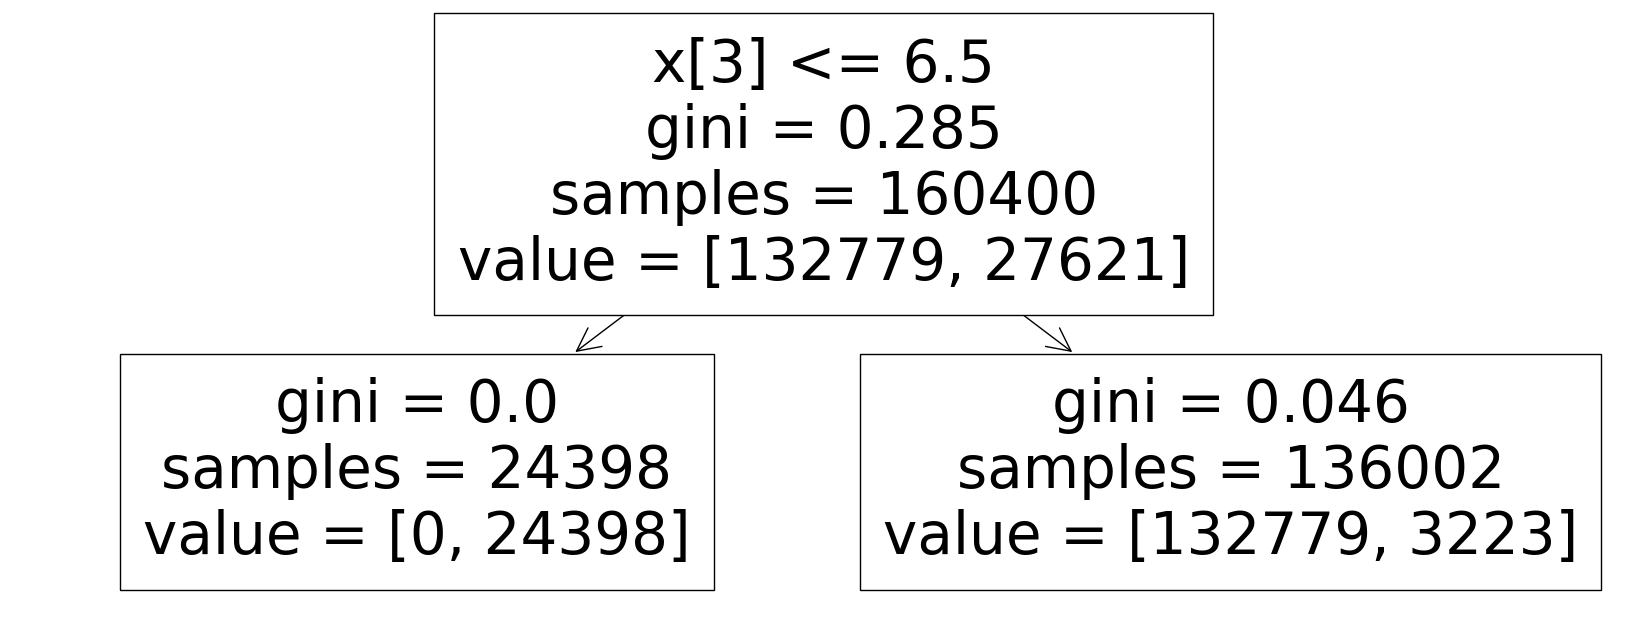

The tree's max depth is:  1  and it has  3  nodes.
Feature 3:  BMI Score: 1.0


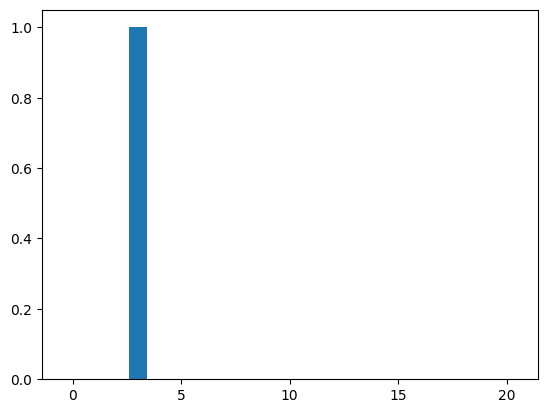

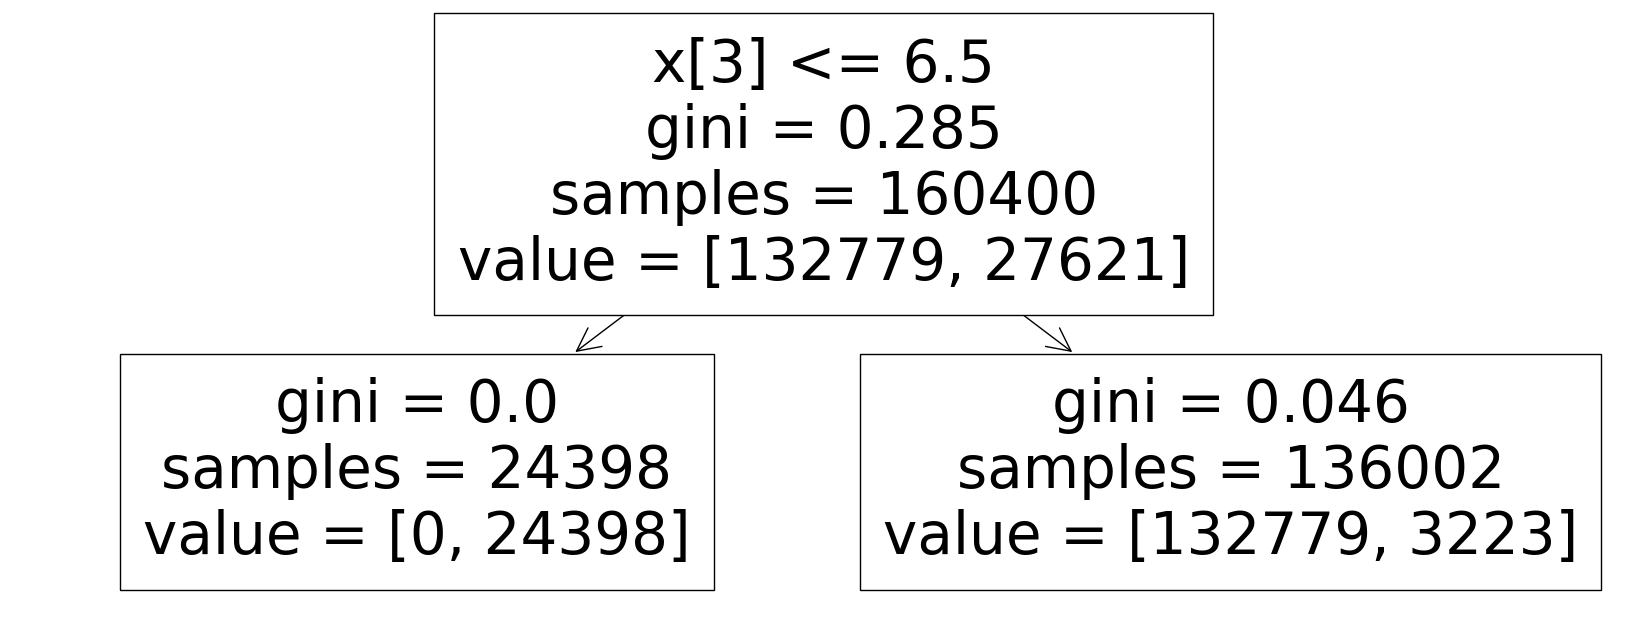

The tree's max depth is:  1  and it has  3  nodes.
Feature 3:  BMI Score: 1.0


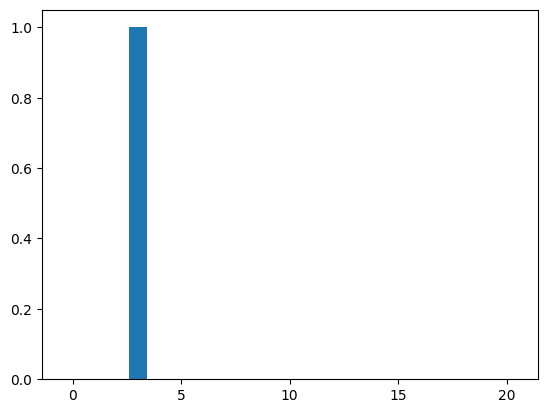

The tree's max depth is:  19  and it has  11791  nodes.
Feature 0:  HighBP Score: 0.00083
Feature 1:  HighChol Score: 0.000753
Feature 2:  CholCheck Score: 0.000341
Feature 3:  BMI Score: 0.916743
Feature 4:  Smoker Score: 0.004223
Feature 5:  Stroke Score: 0.001594
Feature 6:  HeartDiseaseorAttack Score: 0.002034
Feature 7:  PhysActivity Score: 0.003375
Feature 8:  Fruits Score: 0.004299
Feature 9:  Veggies Score: 0.003083
Feature 10:  HvyAlcoholConsump Score: 0.001029
Feature 11:  AnyHealthcare Score: 0.00139
Feature 12:  NoDocbcCost Score: 0.001408
Feature 13:  GenHlth Score: 0.004705
Feature 14:  MentHlth Score: 0.008483
Feature 15:  PhysHlth Score: 0.010294
Feature 16:  DiffWalk Score: 0.002575
Feature 17:  Sex Score: 0.003572
Feature 18:  Age Score: 0.010993
Feature 19:  Education Score: 0.007666
Feature 20:  Income Score: 0.010607


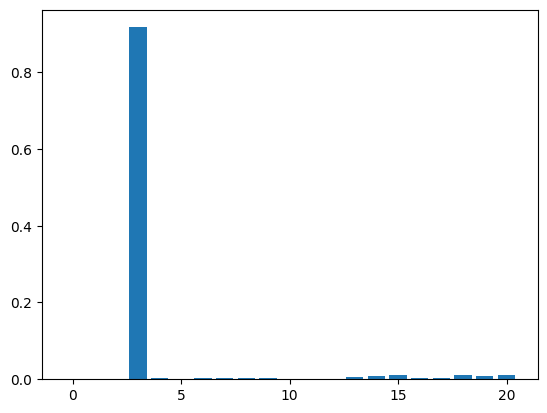

In [160]:
for x in storedtrees:
    displaytrees(x)
    displayfeatureimportance(x)

<p>Figures: Visualization of two decision trees and their feature importances in a graph.</p>
<p>According to the two decision trees, BMI is the best feature to split on for accuracy and precision.. There are no better splits.</p>
<p>While for the Recall decision tree, BMI continues to be the best feature to split on, followed by Age, Income, MentHlth and PhysHlth. As every feature plays a role in splitting in this decision tree, it is overfitted.</p>
<br>Note: The third binary tree cannot be visually displayed due to its size.</p>

<p>Overall, BMI is the strongest feature to classify with. However, Education is the next best feature.
##Note: Sometimes its Education, sometimes its Income. This is because the two features are correlated. This confuses the model as they are both very good features to split on.</p>

<p>Decision Tree model training without BMI and Education as a feature</p>

In [161]:
def dropfeatures(oldset,removefeatures):
    modifiedset=oldset.copy()
    for x in removefeatures:
        modifiedset.drop(columns=x,inplace=True)
    return modifiedset


Highest Accuracy was: 0.9797364133597114  with  3 as its depth


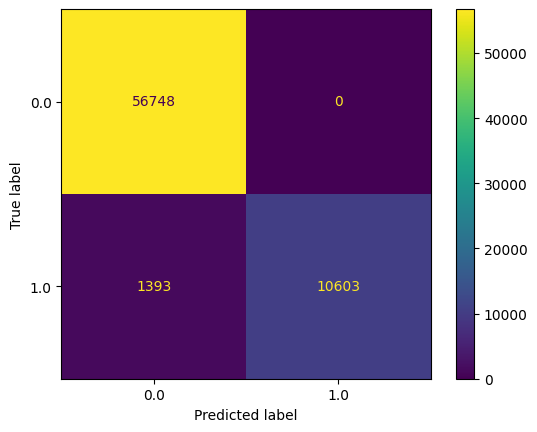

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733

Highest Precision: 1.0  with  3 as its depth


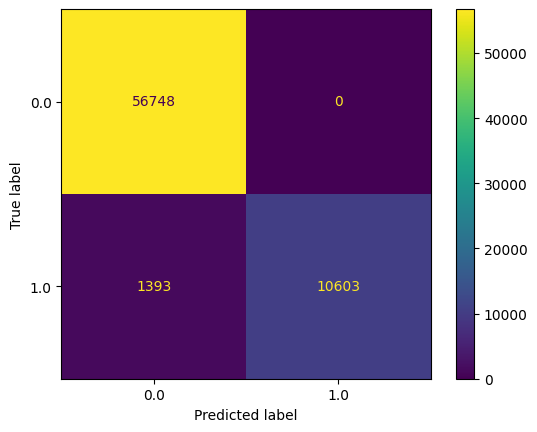

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733

Highest Recall: 0.8877959319773258  with  18 as its depth


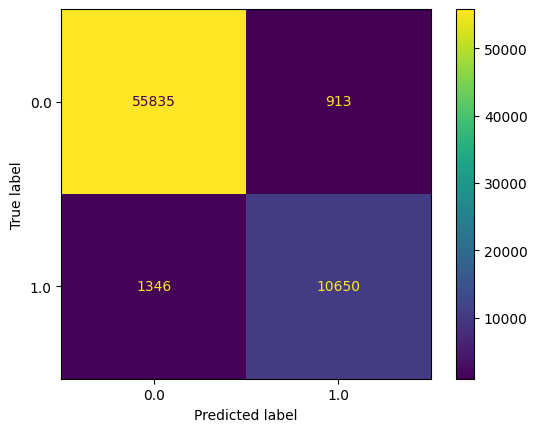

Overall Accuracy was: 0.9671389503083906
Overall Precision: 0.9210412522701721
Overall Recall: 0.8877959319773258


In [195]:
removegen3dtfeatures=['BMI','Education']
X_train2=dropfeatures(X_train,removegen3dtfeatures)
X_test2=dropfeatures(X_test,removegen3dtfeatures)

highestascore=0;ascoredepth=0;highestpscore=0;pscoredepth=0;highestrscore=0;rscoredepth=0;

for n in range (1,20):
    clf=DecisionTreeClassifier(criterion="gini",max_depth=n,max_features=20)
    clf=clf.fit(X_train2,y_train)
    predictions = clf.predict(X_test2)    
    cm = confusion_matrix(y_test,predictions)

    ascore=accuracy_score(y_test,predictions)
    pscore=precision_score(y_test,predictions)
    rscore=recall_score(y_test,predictions)
    if ascore>highestascore:
        highestascore=ascore
        ascoredepth=n
        thirdgendt1=clf
    if pscore>highestpscore:
        highestpscore=pscore
        pscoredepth=n
        thirdgendt2=clf
    if rscore>highestrscore:
        highestrscore=rscore
        rscoredepth=n
        thirdgendt3=clf

storedtrees=[thirdgendt1,thirdgendt2,thirdgendt3]
print('\nHighest Accuracy was:', highestascore,' with ', ascoredepth, 'as its depth')
evaluatemodel(thirdgendt1.predict(X_test2),thirdgendt1)
print("\nHighest Precision:", highestpscore,' with ', pscoredepth, 'as its depth')
evaluatemodel(thirdgendt2.predict(X_test2),thirdgendt2)
print("\nHighest Recall:", highestrscore,' with ', rscoredepth, 'as its depth')
evaluatemodel(thirdgendt3.predict(X_test2),thirdgendt3)

<p>With the removal of BMI and Education as features, the decision trees for the three measures of success change drastically.</p>
<p>For the Accuracy and Precision trees The two trees' accuracy and precision drop by around 1 and 0.001 respectively.</p>
<p>For the Recall tree, the tree's recall drops by around 0.002.</p>
<p>To make sure this isn't a mistake, we'll perform cross-validation.</p>

<h5>Cross Validation</h5>

In [196]:
for trees in range(3):
    scores = cross_validate(storedtrees[trees], X_train2, y_train, cv=5,scoring=scoring)
    print("Tree #",trees+1)
    for x in scoring:
        string="test_"+x
        print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

Tree # 1
0.98 accuracy  with a standard deviation of  0.0
1.0 precision  with a standard deviation of  0.0
0.883 recall  with a standard deviation of  0.002
Tree # 2
0.98 accuracy  with a standard deviation of  0.0
1.0 precision  with a standard deviation of  0.0
0.883 recall  with a standard deviation of  0.002
Tree # 3
0.966 accuracy  with a standard deviation of  0.0
0.915 precision  with a standard deviation of  0.002
0.887 recall  with a standard deviation of  0.002


<p>Cross-validation proves that no matter how the data is split, the results will be the same.</p>

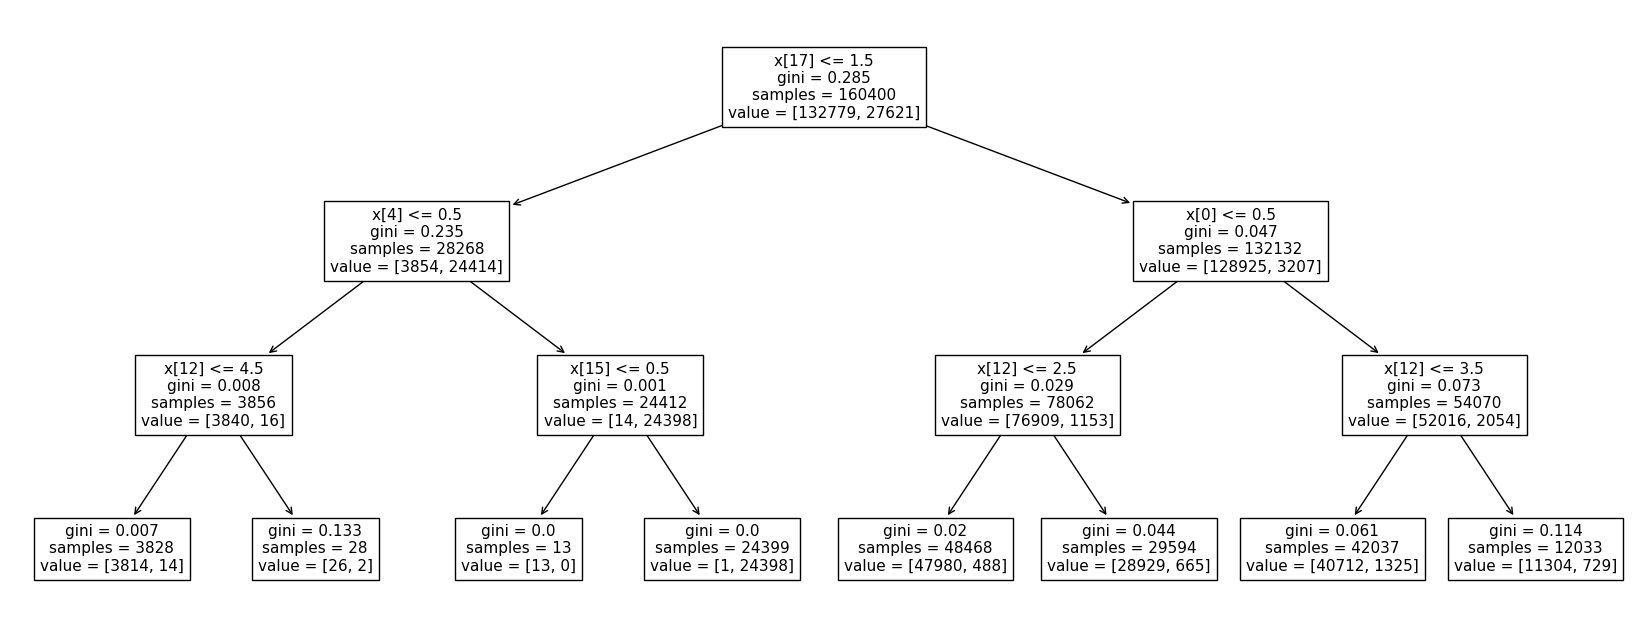

The tree's max depth is:  3  and it has  15  nodes.
Feature 0:  HighBP Score: 0.000872
Feature 4:  Stroke Score: 0.167048
Feature 12:  GenHlth Score: 0.00055
Feature 15:  DiffWalk Score: 0.000658
Feature 17:  Age Score: 0.830873


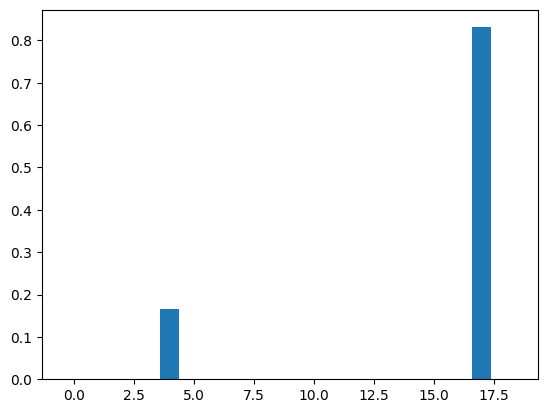

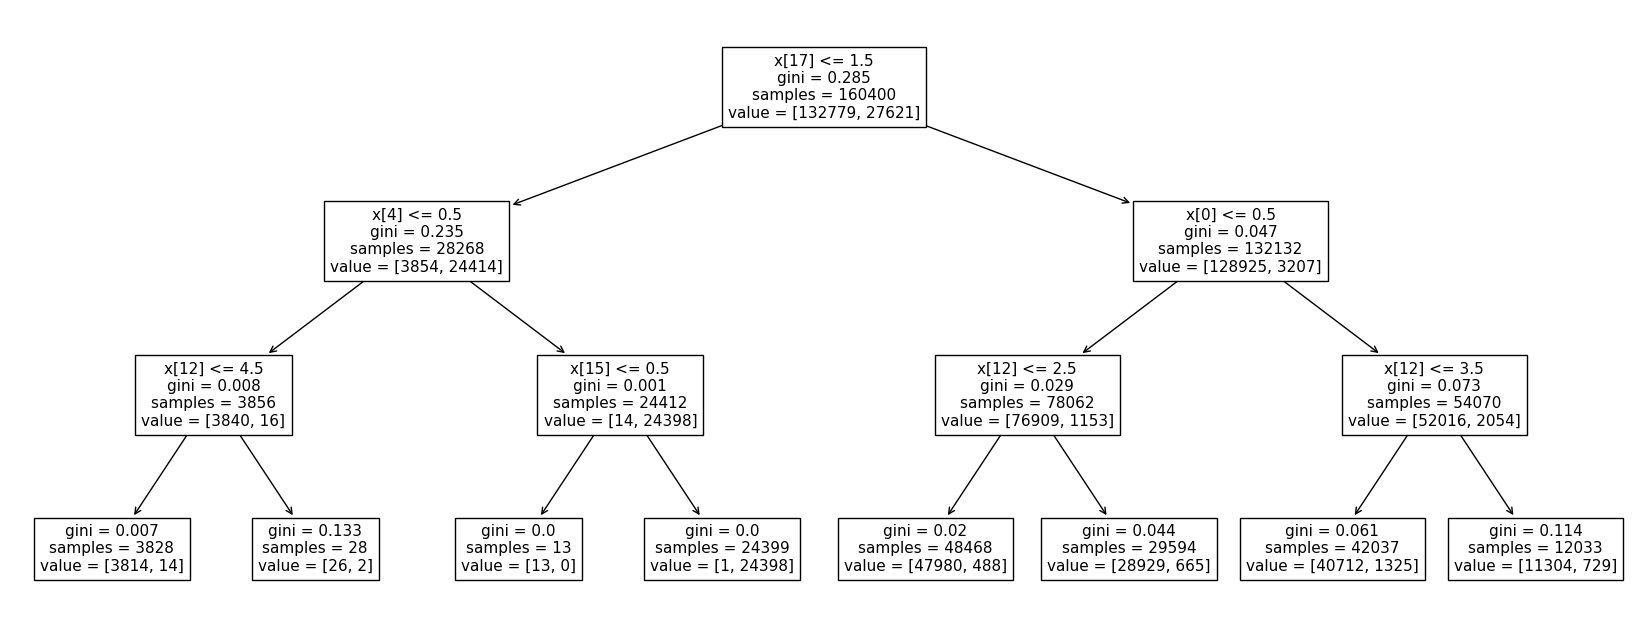

The tree's max depth is:  3  and it has  15  nodes.
Feature 0:  HighBP Score: 0.000872
Feature 4:  Stroke Score: 0.167048
Feature 12:  GenHlth Score: 0.00055
Feature 15:  DiffWalk Score: 0.000658
Feature 17:  Age Score: 0.830873


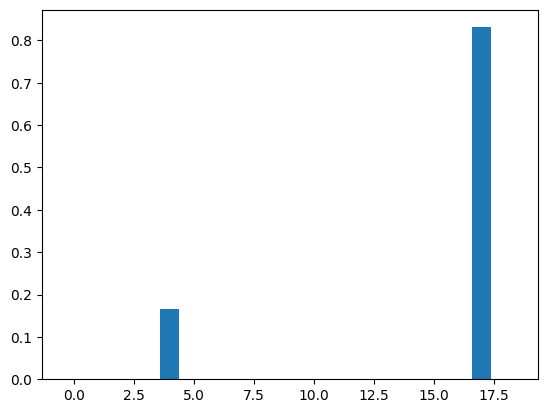

The tree's max depth is:  18  and it has  11121  nodes.
Feature 0:  HighBP Score: 0.000814
Feature 1:  HighChol Score: 0.000515
Feature 2:  CholCheck Score: 0.00055
Feature 3:  Smoker Score: 0.003917
Feature 4:  Stroke Score: 0.15602
Feature 5:  HeartDiseaseorAttack Score: 0.00209
Feature 6:  PhysActivity Score: 0.003403
Feature 7:  Fruits Score: 0.004374
Feature 8:  Veggies Score: 0.0031
Feature 9:  HvyAlcoholConsump Score: 0.001168
Feature 10:  AnyHealthcare Score: 0.001555
Feature 11:  NoDocbcCost Score: 0.001727
Feature 12:  GenHlth Score: 0.003372
Feature 13:  MentHlth Score: 0.009879
Feature 14:  PhysHlth Score: 0.011609
Feature 15:  DiffWalk Score: 0.002973
Feature 16:  Sex Score: 0.003689
Feature 17:  Age Score: 0.77877
Feature 18:  Income Score: 0.010476


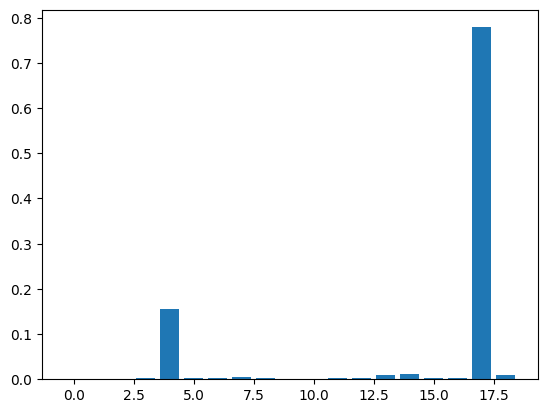

In [197]:
for x in storedtrees:
    displaytrees(x)
    displayfeatureimportance(x)

<p>For the Accuracy and Precision trees, they no longer have a depth of 1. Instead, they have a tree depth of 3 or 4 depending on the run. In the absence of BMI and Education as a feature for splitting, they have Age as the best splitting feature, followed by HighBP, Stroke, GenHlth, and Diffwalk. 

For the Recall tree, the tree depth remains at 18-19. Its best splitting feature is also Age followed by Stroke. But just like before, this tree uses all features which means it is overfitted.
<br>##Note there are minor discrepancies due to retraining of the model. It is not the same every time but close to the same.<br>
In summary, without BMI and Education, the next best features for splits is Age and Stroke history and there is no further optimization or changes that can be done to improve performance.</p>

<h4>Binary Logistic Regression</h4>

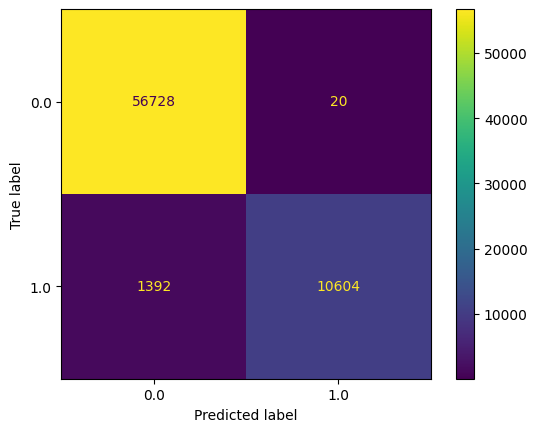

Overall Accuracy was: 0.9794600256022343
Overall Precision: 0.9981174698795181
Overall Recall: 0.8839613204401467


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logregr=LogisticRegression(max_iter=3000)
logregr=logregr.fit(X_train,y_train)
prediction = logregr.predict(X_test)    
evaluatemodel(prediction,logregr)

<p>As we can see here, our first logistic regression model has almost the same performance as our decision trees. To make sure this isn't a mistake, we'll perform cross-validation.</p>

<h5>Cross Validation</h5>

In [166]:
scores = cross_validate(logregr, X_train, y_train, cv=5,scoring=scoring)
for x in scoring:
    string="test_"+x
    print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

0.98 accuracy  with a standard deviation of  0.0
0.998 precision  with a standard deviation of  0.001
0.883 recall  with a standard deviation of  0.002


<h5>Feature Coefficients</h5>

The logistic regression model's intercept is:  [-2.98318083]
Feature 0:  HighBP Score: 0.776552
Feature 1:  HighChol Score: 0.809306
Feature 2:  CholCheck Score: 1.157499
Feature 3:  BMI Score: -0.024371
Feature 4:  Smoker Score: -0.081505
Feature 5:  Stroke Score: 0.879668
Feature 6:  HeartDiseaseorAttack Score: 0.544948
Feature 7:  PhysActivity Score: 0.105922
Feature 8:  Fruits Score: 0.294731
Feature 9:  Veggies Score: 0.0712
Feature 10:  HvyAlcoholConsump Score: 0.90997
Feature 11:  AnyHealthcare Score: 0.721532
Feature 12:  NoDocbcCost Score: 0.875292
Feature 13:  GenHlth Score: -0.134358
Feature 14:  MentHlth Score: -0.0053
Feature 15:  PhysHlth Score: -0.01371
Feature 16:  DiffWalk Score: 0.764434
Feature 17:  Sex Score: 0.300552
Feature 18:  Age Score: -0.067077
Feature 19:  Education Score: -0.40957
Feature 20:  Income Score: -0.110204


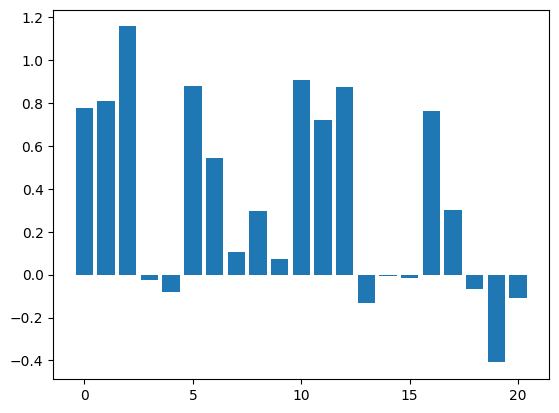

In [167]:
displayfeatureimportance(logregr)

<p>The first binary logistic regression model shows us with features are negatively correlated with diabetes and which features are positively correlated. In this case, the model tells us that HighBP, HighChol, CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk and Sex are positively correlated with diabetes. While GenHlt, Age, Education and Income are negatively correlated. With BMI, Smoker, MentHlth, PhysHlth have correlation coefficients close to 0.</p><br>
<p>At first glance it doesn't seem to make sense but it does.</p>
<p>For the positively correlated features:</p>
<p>If you have HighBP or HighChol, it is more likely that you have diabetes than you do not.<br>
If you haven't check your cholestrol within the past 5 years, you are more likely to have diabetes than not because it shows that you are not paying attention to your health.<br>
If you have history of a stroke or heart disease/attack, then you are more likely to have diabetes.<br>
If you eat fruits and vegetables which are high in sugar then you are likely to have diabetes.<br>
If you drink alcohol excessively, then you are likely to have diabetes as you do not take care of your health.<br>
If you have healthcare, then you are likely to have diagnosed your diabetes as opposed to those who haven't. This is a bias identified by the model.<br>
If you can't access a doctor because of the costs, you are likely to have diabetes because you cannot take care of your health.<br>
If you have difficulty walking, you are likely to have diabetes as this means you cannot exercise.<br>
<br>
<p>For the negatively correlated features:</p>
<p>GenHlt does't make sense.<br>
Age is negatively correlated due to the bias in the data with most people being older as opposed to younger.<br>
Education is negatively correlated since the more educated one is, the more likely they know how to prevent diabetes with proper nutrician and exercise.<br>
Income is similar to Education in the sense that the more an individual earns, the more likely they can purchase healthier foods and avoid foods with high sugar.<br>
<br>
<p>For the features close to zero <br>
BMI does not cause diabetes which is why it is the correlation is close to 0.<br>
Smoking doesn't make sense. According to research, it causes Type 2 Diabetes.<br>
MentHtlh does not cause diabetes.<br>
PhysHlth helps handle diabetes, so it doesn't make sense for it to not be correlated.</p>

<p>Now that we know more about the features, lets select some for use in the next model iteration. We will remove the ones with correlation coefficients below +-0.3.</p>

<h4>Binary Logistic Regression Optimization</h4>

In [168]:
features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
removegen2logregrfeatures=['BMI','Fruits','Veggies','GenHlth','Smoker','MentHlth','PhysHlth','Sex','Age','Income']
X_train2=dropfeatures(X_train,removegen2logregrfeatures)
X_test2=dropfeatures(X_test,removegen2logregrfeatures)

The logistic regression model's intercept is:  [-4.30756489]


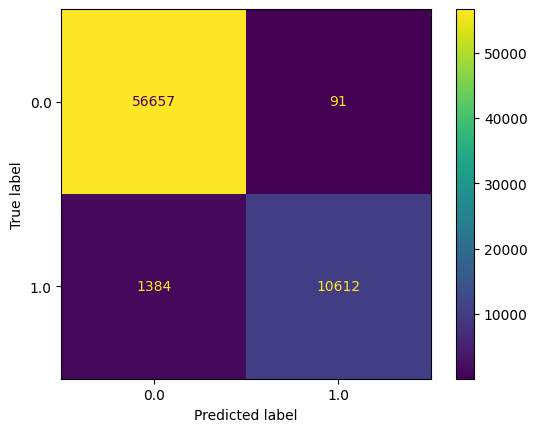

Overall Accuracy was: 0.9785435819853369
Overall Precision: 0.9914977109221713
Overall Recall: 0.8846282094031344


In [169]:
secgenlogregr=LogisticRegression(max_iter=3000)
secgenlogregr=secgenlogregr.fit(X_train2,y_train)
prediction = secgenlogregr.predict(X_test2)
print("The logistic regression model's intercept is: ",secgenlogregr.intercept_)
evaluatemodel(prediction,secgenlogregr)

<p>After removing the features with coefficients less than 0.3, the recall improves marginally while the accuracy and precision worsen marginally.</p>

<p>Let's try a feature subset with only the features that directly relate to health.</p>

In [170]:
features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
removegen3logregrfeatures=['AnyHealthcare','NoDocbcCost','Fruits','Veggies','GenHlth','MentHlth','Sex','Age','Income','Education']
X_train2=dropfeatures(X_train,removegen3logregrfeatures)
X_test2=dropfeatures(X_test,removegen3logregrfeatures)

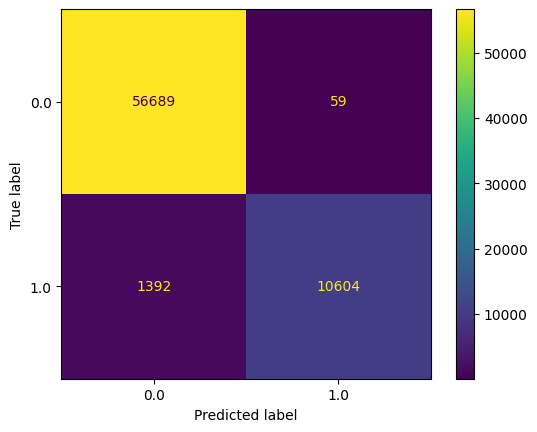

Overall Accuracy was: 0.9788927033632026
Overall Precision: 0.9944668479789928
Overall Recall: 0.8839613204401467


In [171]:
thirdgenlogregr=LogisticRegression(max_iter=3000)
thirdgenlogregr=thirdgenlogregr.fit(X_train2,y_train)
prediction = thirdgenlogregr.predict(X_test2)    
evaluatemodel(prediction,thirdgenlogregr)

The logistic regression model's intercept is:  [-3.68786392]
Feature 0:  HighBP Score: 0.811382
Feature 1:  HighChol Score: 0.815801
Feature 2:  CholCheck Score: 1.016155
Feature 3:  BMI Score: -0.091683
Feature 4:  Smoker Score: 0.024867
Feature 5:  Stroke Score: 1.307857
Feature 6:  HeartDiseaseorAttack Score: 0.79075
Feature 7:  PhysActivity Score: 0.174628
Feature 8:  HvyAlcoholConsump Score: 1.35892
Feature 9:  PhysHlth Score: -0.025384
Feature 10:  DiffWalk Score: 1.264486


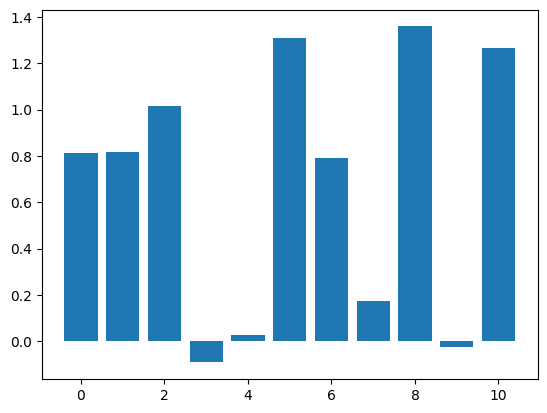

In [172]:
displayfeatureimportance(thirdgenlogregr)

<p>The model does not show any significant improvement over the first and second iterations.</p>
<p>Let's see what happens if we instead try a subset of the features with low correlation.</p>

In [173]:
features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
removegen4logregrfeatures=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Education']

X_train2=dropfeatures(X_train,removegen4logregrfeatures)
X_test2=dropfeatures(X_test,removegen4logregrfeatures)

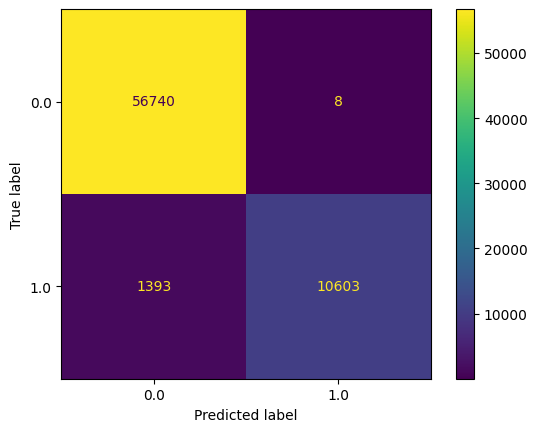

Overall Accuracy was: 0.9796200395670895
Overall Precision: 0.9992460654038262
Overall Recall: 0.8838779593197733


In [174]:
fourthgenlogregr=LogisticRegression(max_iter=3000)
fourthgenlogregr=fourthgenlogregr.fit(X_train2,y_train)
prediction = fourthgenlogregr.predict(X_test2)    
evaluatemodel(prediction,fourthgenlogregr)

The logistic regression model's intercept is:  [2.07408644]
Feature 0:  BMI Score: -0.154971
Feature 1:  Smoker Score: 0.461622
Feature 2:  PhysActivity Score: -0.011594
Feature 3:  Fruits Score: 0.468285
Feature 4:  Veggies Score: 0.163756
Feature 5:  GenHlth Score: -0.053615
Feature 6:  MentHlth Score: -0.007488
Feature 7:  PhysHlth Score: 0.003914
Feature 8:  Sex Score: 0.821229
Feature 9:  Age Score: -0.067913
Feature 10:  Income Score: -0.362037


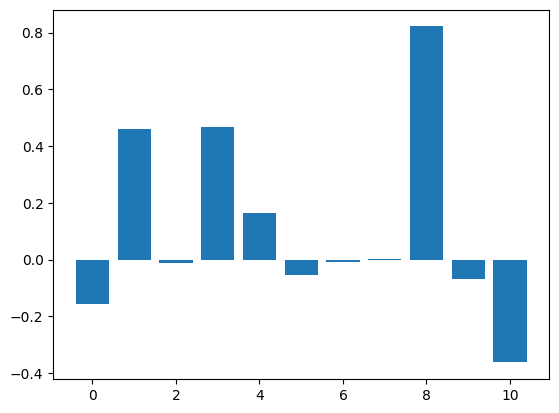

In [175]:
displayfeatureimportance(fourthgenlogregr)

<p>Despite the arbitrary selection of features based on their correlation coefficients, the accuracy, precision and recall are not changing by any meaningful amount.</p>

<p>Next we will try a model with features that can be measured at home and the ones features that involve an individual's medical history which individuals should know. Such features are: HighBP, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits and Veggies. We will also add in Sex. However, we will keep Age out as our data is biased.</p>

In [176]:
features=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies', 'HvyAlcoholConsump',
'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
removegen5logregrfeatures=['HighChol','CholCheck','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','DiffWalk','Age','Education','Income']

X_train2=dropfeatures(X_train,removegen5logregrfeatures)
X_test2=dropfeatures(X_test,removegen5logregrfeatures)

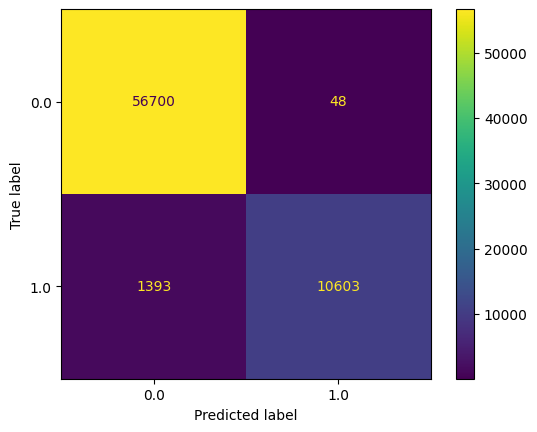

Overall Accuracy was: 0.97903817060398
Overall Precision: 0.9954933809032016
Overall Recall: 0.8838779593197733


In [177]:
fifthgenlogregr=LogisticRegression(max_iter=3000)
fifthgenlogregr=fifthgenlogregr.fit(X_train2,y_train)
prediction = fifthgenlogregr.predict(X_test2)    
evaluatemodel(prediction,fifthgenlogregr)

The logistic regression model's intercept is:  [-2.18493469]
Feature 0:  HighBP Score: 1.167051
Feature 1:  BMI Score: -0.106002
Feature 2:  Smoker Score: 0.088418
Feature 3:  Stroke Score: 1.633708
Feature 4:  HeartDiseaseorAttack Score: 1.048277
Feature 5:  PhysActivity Score: -0.048865
Feature 6:  Fruits Score: 0.313944
Feature 7:  Veggies Score: -0.027329
Feature 8:  HvyAlcoholConsump Score: 1.373261
Feature 9:  PhysHlth Score: -0.00331
Feature 10:  Sex Score: 0.384398


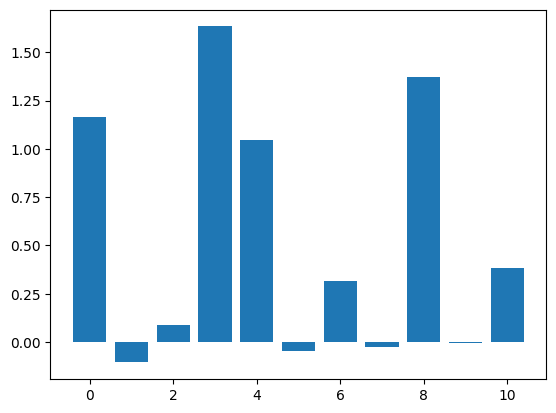

In [178]:
displayfeatureimportance(fifthgenlogregr)

<p>Despite the selection of features that non-medical individuals can understand and obtain easily, the newly trained model's performance does not decline. Its accuracy, precision and recall stay the same, with only around 0.001 of a difference. I can think of nothing else to be done to improve the models.</p>

<h5>Cross Validation</h5>

<p>At this point, cross-validation isn't necessary but we will perform it anyways.</p>

In [179]:
scores = cross_validate(fifthgenlogregr, X_train2, y_train, cv=5,scoring=scoring)
for x in scoring:
    string="test_"+x
    print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

0.979 accuracy  with a standard deviation of  0.0
0.995 precision  with a standard deviation of  0.001
0.883 recall  with a standard deviation of  0.002


<p>The evaluation metrics are close to the same as the original.</p>

<h4>KNN</h4>

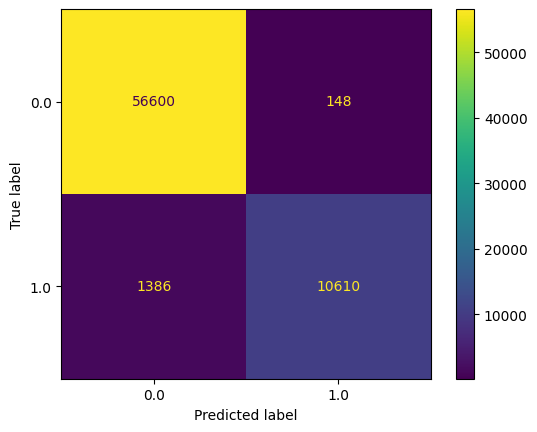

Overall Accuracy was: 0.9776853252647504
Overall Precision: 0.986242796058747
Overall Recall: 0.8844614871623875


In [205]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(X_train, y_train)
predictions = KNNmodel.predict(X_test)
evaluatemodel(predictions,KNNmodel)

<h5>KNN Cross Validation</h5>

In [182]:
scores = cross_validate(KNNmodel, X_train, y_train, cv=5,scoring=scoring)
for x in scoring:
    string="test_"+x
    print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

0.978 accuracy  with a standard deviation of  0.0
0.986 precision  with a standard deviation of  0.0
0.884 recall  with a standard deviation of  0.002


<h4>Naive Bayes</h4>

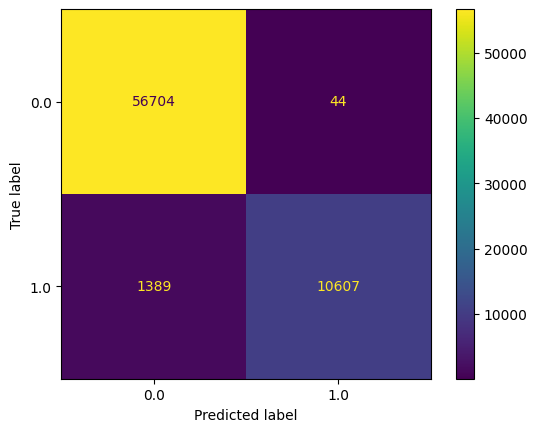

Overall Accuracy was: 0.9791545443966019
Overall Precision: 0.9958689324946014
Overall Recall: 0.8842114038012671


In [204]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train,y_train)
predictions1 = NaiveBayes.predict(X_test)
evaluatemodel(predictions1,NaiveBayes)

<h5>Naive Bayes Cross Validation</h5>

In [185]:
scores = cross_validate(NaiveBayes, X_train, y_train, cv=5,scoring=scoring)
for x in scoring:
    string="test_"+x
    print(round(scores[string].mean(),3),x," with a standard deviation of ",round(scores[string].std(),3))

0.978 accuracy  with a standard deviation of  0.001
0.984 precision  with a standard deviation of  0.002
0.884 recall  with a standard deviation of  0.002


<h3>Storing each model</h3>

In [206]:
import os.path
import joblib
#The trained models
listofmodels=[firstdt,randomforest,
              secgendt1,secgendt2,secgendt3,
              thirdgendt1,thirdgendt2,thirdgendt3,
              logregr,secgenlogregr,thirdgenlogregr,fourthgenlogregr, fifthgenlogregr, 
              KNNmodel,NaiveBayes]

#The training and testing datasets
data=[X_train, X_test, y_train, y_test]

#These are the features removed from the 21 base features for each generation of model iteration.
featureslistbymodelgen=[removegen3dtfeatures,removegen2logregrfeatures,removegen3logregrfeatures,removegen4logregrfeatures,removegen5logregrfeatures]


path='./savedmodels/models.joblib'
if not (os.path.isfile(path)):
    #save the models
    savepath='./savedmodels/'
    filename1=os.path.join(savepath,'models.joblib')
    to_persist=listofmodels
    joblib.dump(to_persist,filename1)

path='./savedmodels/datasetsplit.joblib'
if not (os.path.isfile(path)):
    #save the models
    savepath='./savedmodels/'
    filename2=os.path.join(savepath,'datasetsplit.joblib')
    to_persist=data
    joblib.dump(to_persist,filename2)

path='./savedmodels/removefeatures.joblib'
if not (os.path.isfile(path)):
    #save the lists of features
    filename3=os.path.join(savepath,'removefeatures.joblib')
    to_persist=featureslistbymodelgen
    joblib.dump(to_persist,filename3)


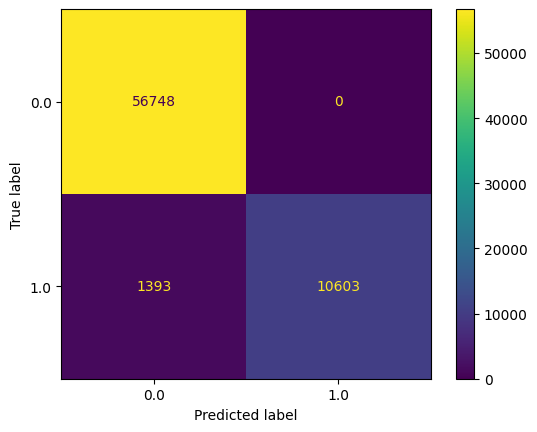

Overall Accuracy was: 0.9797364133597114
Overall Precision: 1.0
Overall Recall: 0.8838779593197733


In [187]:
#To test if it saved properly
importmodels=joblib.load(filename1)
#print(importmodels)
dt=importmodels[0]
predictions=dt.predict(X_test)
evaluatemodel(predictions,dt)

In [188]:
#Test to see if the training and testing datasets were saved properly.
importdatasets=joblib.load(filename2)
X_train, X_test, y_train, y_test=importdatasets[0],importdatasets[1],importdatasets[2],importdatasets[3],
X_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,...,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000,160400.000000
mean,0.491297,0.492238,0.960767,23.850842,0.538946,0.182868,0.221640,0.790461,0.676883,0.831970,...,0.952681,0.228360,2.251378,2.977481,3.622425,0.281010,0.518036,6.817226,4.412213,5.252949
std,0.499926,0.499941,0.194150,11.103455,0.498482,0.386559,0.415351,0.406981,0.467669,0.373894,...,0.212321,0.419777,1.082732,6.920319,7.864399,0.449494,0.499676,3.813831,1.701241,2.606209
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.000000
50%,0.000000,0.000000,1.000000,26.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,7.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [189]:
#To see if the lists of removedfeatures is stored properly so that they can be used to create the feature subsets
#that some of models are trained on.
importfeatures=joblib.load(filename3)
#print(importfeatures)

removefeatures=importfeatures[0]
X_test2=dropfeatures(X_test,removefeatures)
X_test2.describe()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
count,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000
mean,0.494880,0.492552,0.960069,0.539829,0.184351,0.222332,0.789480,0.675986,0.832887,0.212629,0.951428,0.231497,2.248618,2.959720,3.566624,0.281377,0.521049,6.794091,5.240094
std,0.499977,0.499948,0.195798,0.498415,0.387773,0.415816,0.407681,0.468009,0.373079,0.409171,0.214972,0.421792,1.082825,6.884051,7.789923,0.449674,0.499560,3.804269,2.608651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,7.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,10.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,8.000000


<h4>Import Models</h4>
<p>Run this first to import all models. This allows you to skip the fitting phase.</p>

In [190]:
import os.path
import joblib
#Importing all saved models, datasets and removedfeaturelists into jupyterlab
importmodels=joblib.load('./savedmodels/models.joblib')
firstdt,randomforest,secgendt1,secgendt2,secgendt3,thirdgendt1,thirdgendt2,thirdgendt3=importmodels[0],importmodels[1],importmodels[2],importmodels[3],importmodels[4],importmodels[5],importmodels[6],importmodels[7]
logregr,secgenlogregr,thirdgenlogregr,fourthgenlogregr, fifthgenlogregr=importmodels[8],importmodels[9],importmodels[10],importmodels[11],importmodels[12],
KNNmodel,NaiveBayes=importmodels[13],importmodels[14]

importdatasets=joblib.load('./savedmodels/datasetsplit.joblib')
X_train, X_test, y_train, y_test=importdatasets[0],importdatasets[1],importdatasets[2],importdatasets[3],


importfeatures=joblib.load('./savedmodels/removefeatures.joblib')

removegen3dtfeatures=importfeatures[0]
removegen2logregrfeatures=importfeatures[1]
removegen3logregrfeatures=importfeatures[2]
removegen4logregrfeatures=importfeatures[3]
removegen5logregrfeatures=importfeatures[4]


<h2>Probability Analysis</h2>

<h3>Probabilistic Analysis Binomial  Distribution</h3>

The distribtution seeks to find the likelihood of people being at risk of having Diabetes in relation to a health feature or lifestyle. From this distrubtion we seek to identify the key attributes that are potenially linked to being at risk for Diabetes. 

It's the important to note that we use a sample size of 100 relative to the population size of 229,781, we can still effectively apply statistical methods such as the binomial distribution to the model even though our sample is small relative to the population, it still remains statistically significant and provides valuable insights into the variability of diabetes within the sample and overall population.


### Probability Distribution Binomial For Categorical Features

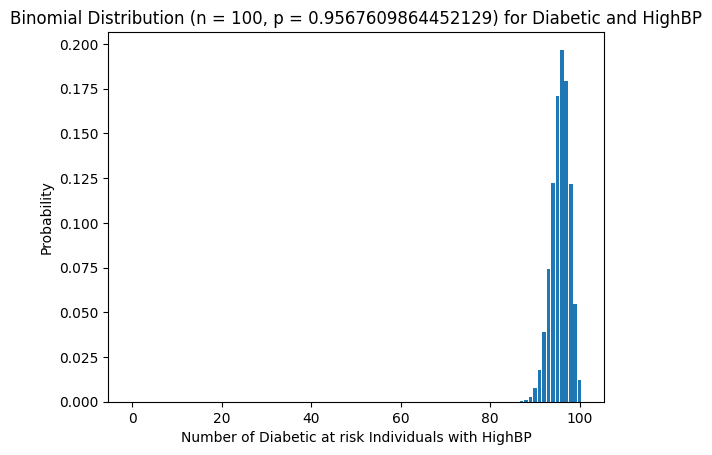

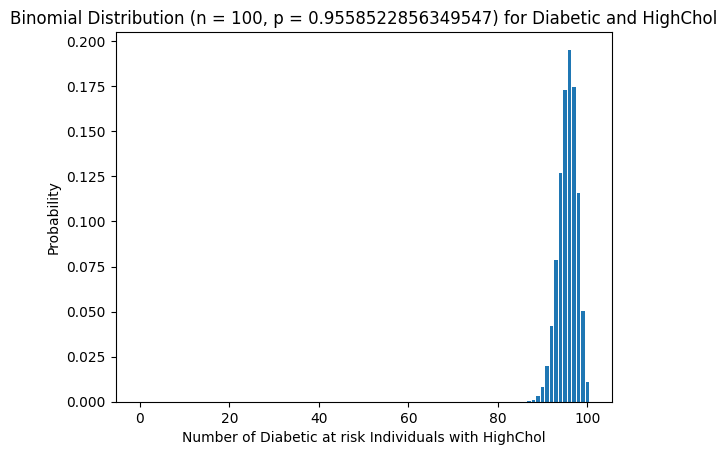

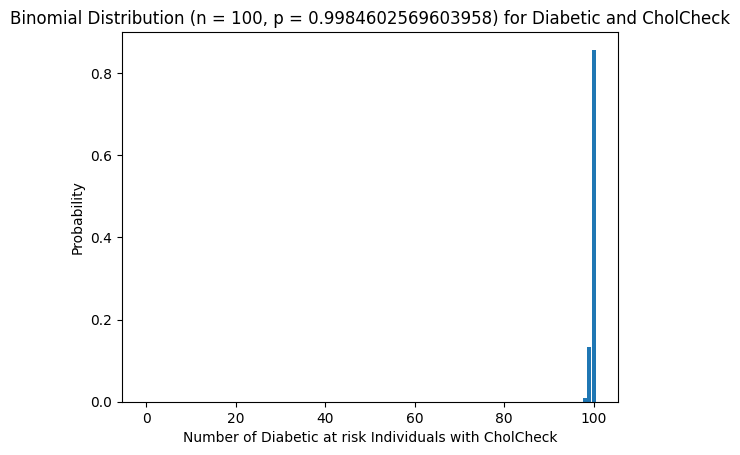

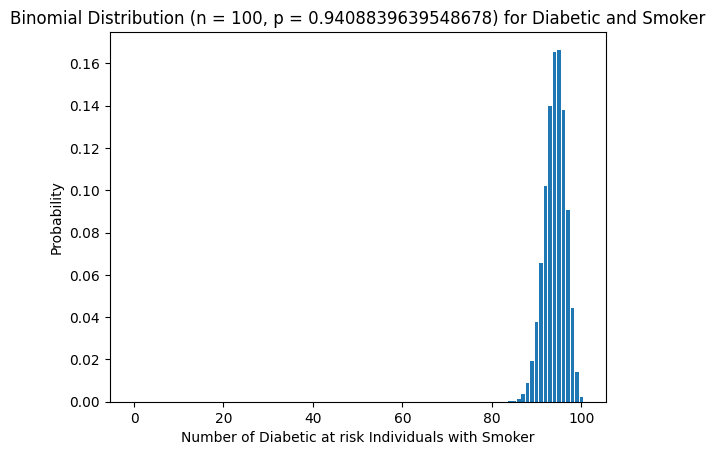

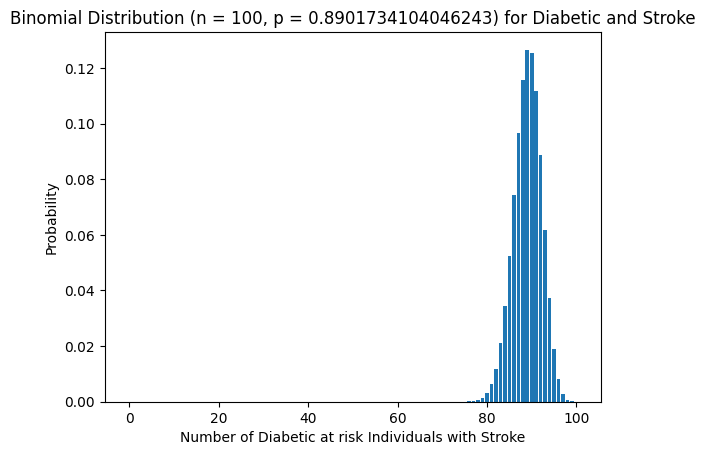

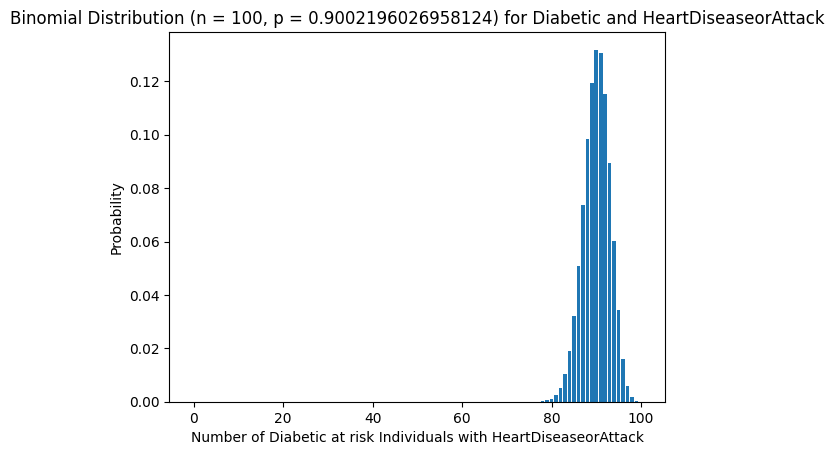

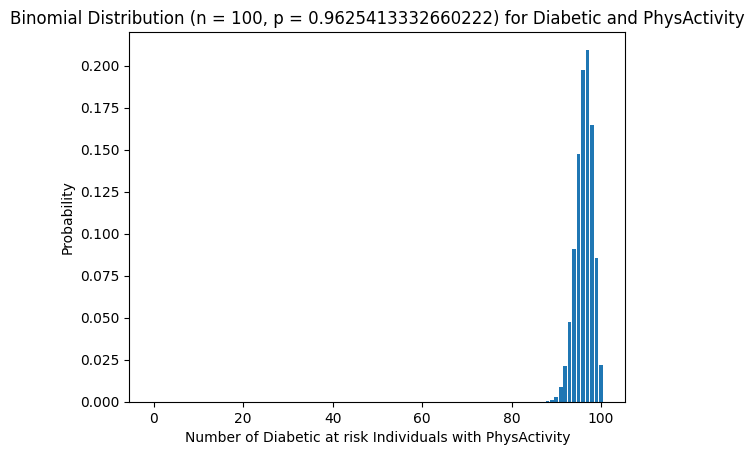

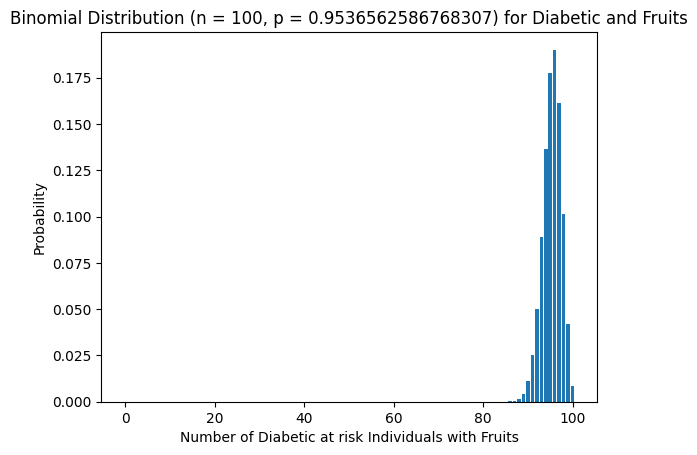

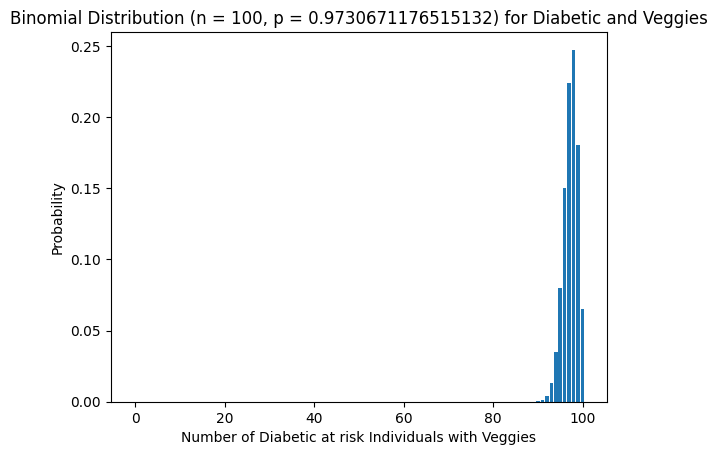

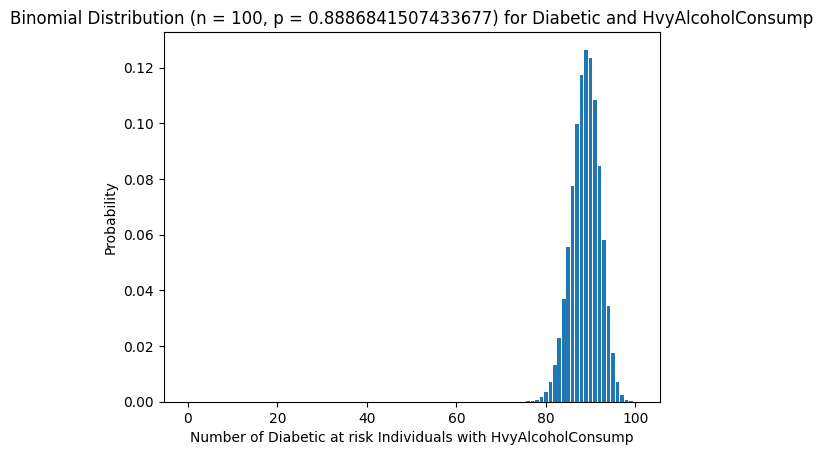

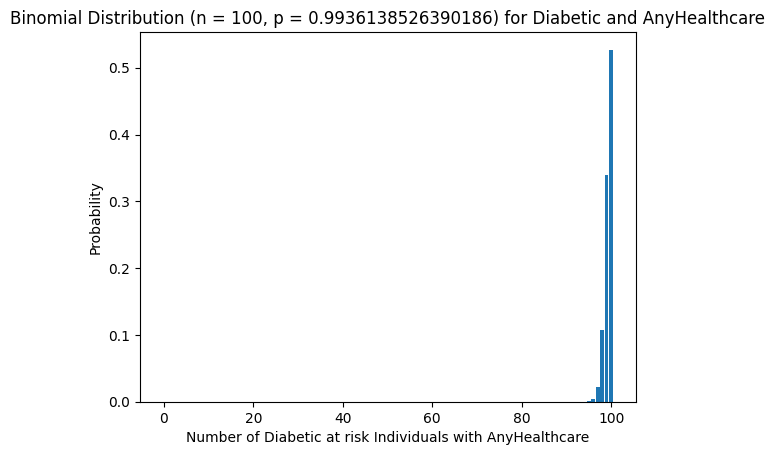

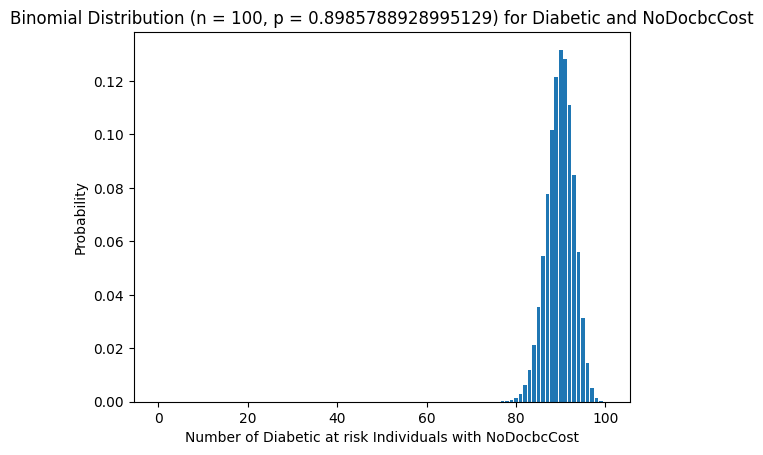

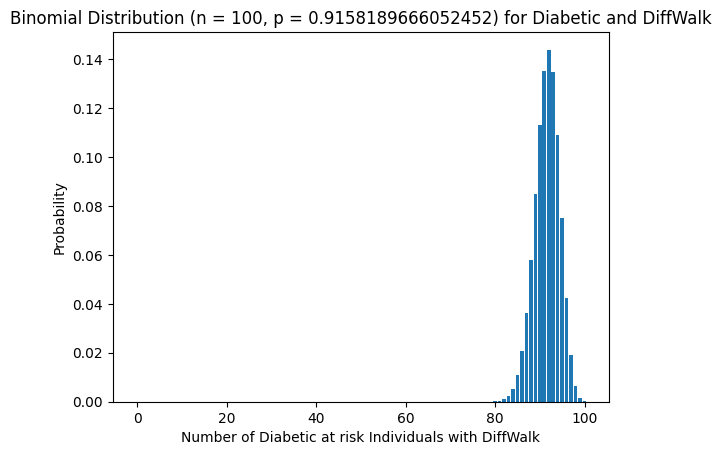

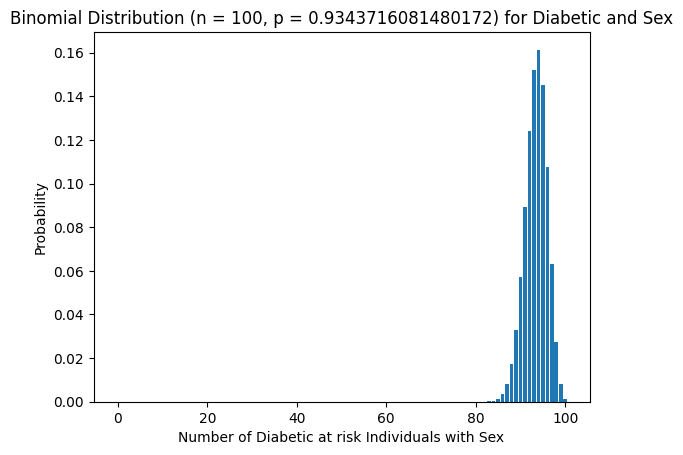

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom
import math


for feature_name in categorical_features: 
    # Calculate the proportion of individuals with diabetes having high feature, cholestral and etc

    diabetes_data = df[df['Diabetes'] == 1]

    total_diabetic = len(diabetes_data)

    #print(total_val)
    high_ft_val = df[df['Diabetes'] == 1] [feature_name].sum()
                   
    #print(high_ft_val)
    high_val_prob = high_ft_val / total_diabetic
    # Define the parameters for the binomial distribution
    n = 100  # Sample size
    p  = high_val_prob  # Probability of having high feature given diabetes
    # Generate the range of values for x
    r_values = list(range(n+1))

    prob1 = []
    cumulative_prob = 0
    for i in range(n+1):
        m = math.comb(n,i)
        prob = m * (p ** i) * ((1 - p) ** (n - i))    
        cumulative_prob += prob
        prob1.append(prob)

    # Calculate the probability mass function (pmf) for each value of x
    pmf = [binom.pmf(r,n,p) for r in r_values]
    # Plot the binomial distribution
    plt.bar(r_values, pmf)

    # Add labels and title
    plt.xlabel(f'Number of Diabetic at risk Individuals with {feature_name}')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution (n = {n}, p = {p}) for Diabetic and {feature_name}')

    # Show plot
    plt.show()

<p>Essentially  the Binomial distribution informs us that the categorical features  are key indicators at predicting whether a person has a higher probability of being at risk for Diabetes. This is illustrated by the graphs being skewed to the left and probability being greater than 0.5.
Noticable features to take note of is access to health care which has a probability of 99.4%. This however most likely stems from the fact that more people have healthcare then don't. Thus it doesnt necessarily link to a person being more at risk for diabetes because they have healthcare. Rather the features that most likely contribute to a person being at risk for Diabetes includes high blood pressure and high cholesterol which have the highest probability. </p>

<h3>Probability Distribution Binomial For Ordinal Features</h3>

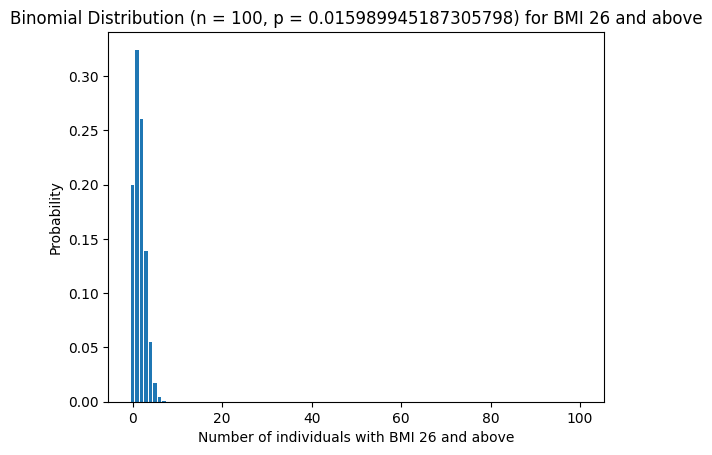

In [209]:
filtered_data_BMI = df[(df['Diabetes'] == 1 ) & (df['BMI'] >= 26)]
count_BMI = filtered_data_BMI.count()
filtered_data_BMI
# Define parameters
n = 100  # Total number of individuals (trials)
p_BMI= len(filtered_data_BMI)/len(df)
# Generate range of values for x (number of individuals in specified BMI category)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
pmf = binom.pmf(x_values, n, p_BMI)
# Plot the binomial distribution
plt.bar(x_values, pmf)
plt.xlabel('Number of individuals with BMI 26 and above')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, p = {p_BMI}) for BMI 26 and above')
plt.show()


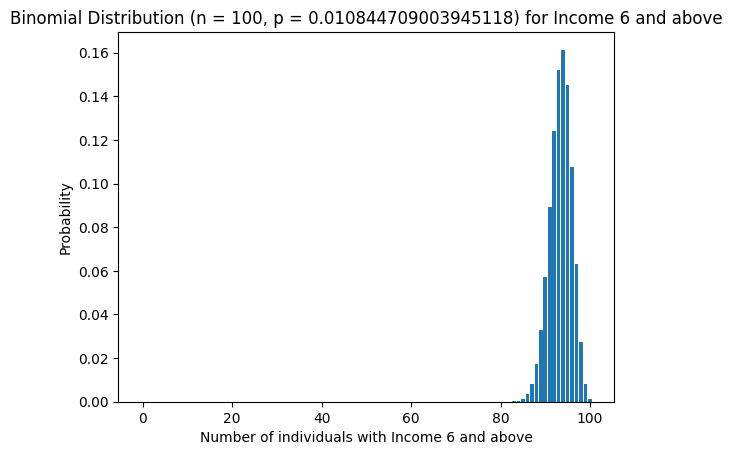

In [210]:
filtered_data_income = df[(df['Diabetes'] == 1 ) & (df['Income'] >= 6)]
count_income = filtered_data_income.count()
# Define parameters
n = 100 # Total number of individuals (trials)
p_income = len(filtered_data_income)/len(df)
# Generate range of values for x (number of individuals in specified BMI category)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
pmf = binom.pmf(x_values, n, p)
# Plot the binomial distribution
plt.bar(x_values, pmf)
plt.xlabel('Number of individuals with Income 6 and above')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, p = {p_income}) for Income 6 and above')
plt.show()

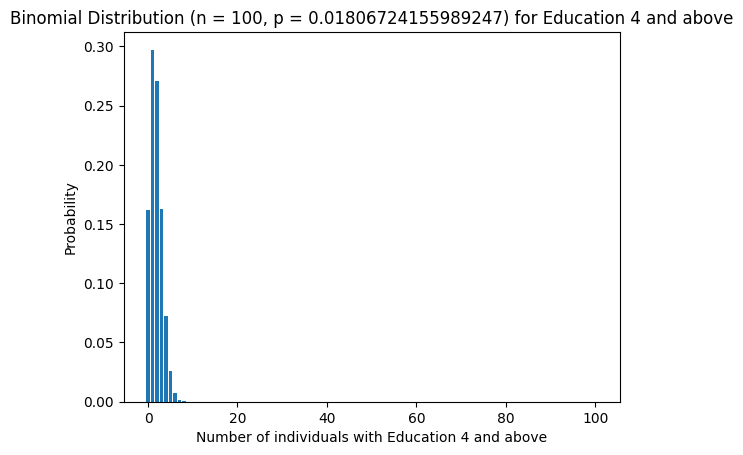

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

filtered_data_education = df[(df['Diabetes'] == 1 ) & (df['Education'] >= 4)]
count_education = filtered_data_education.count()
# Define parameters
n = 100 # Total number of individuals (trials)
p_education = len(filtered_data_education)/len(df)
# Generate range of values for x (number of individuals in specified BMI category)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
pmf = binom.pmf(x_values, n, p_education)
# Plot the binomial distribution
plt.bar(x_values, pmf)
plt.xlabel('Number of individuals with Education 4 and above')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, p = {p_education}) for Education 4 and above')
plt.show()

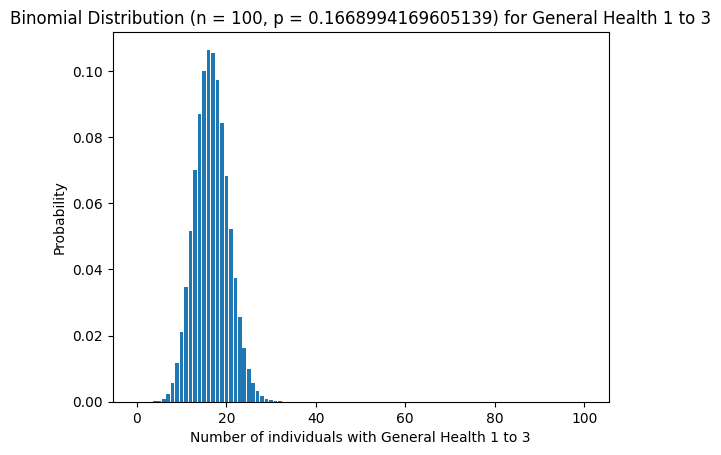

In [213]:
filtered_data_genHlth = df[(df['Diabetes'] == 1 ) & (df['GenHlth'] >= 1)& (df['GenHlth'] <= 3)]
count_genHlth = filtered_data_genHlth.count()
# Define parameters
n = 100  # Total number of individuals (trials)
p_genHlth= len(filtered_data_genHlth)/len(df)
# Generate range of values for x (number of individuals in specified BMI category)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
pmf = binom.pmf(x_values, n, p_genHlth)
# Plot the binomial distribution
plt.bar(x_values, pmf)
plt.xlabel('Number of individuals with General Health 1 to 3')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, p = {p_genHlth}) for General Health 1 to 3')
plt.show()

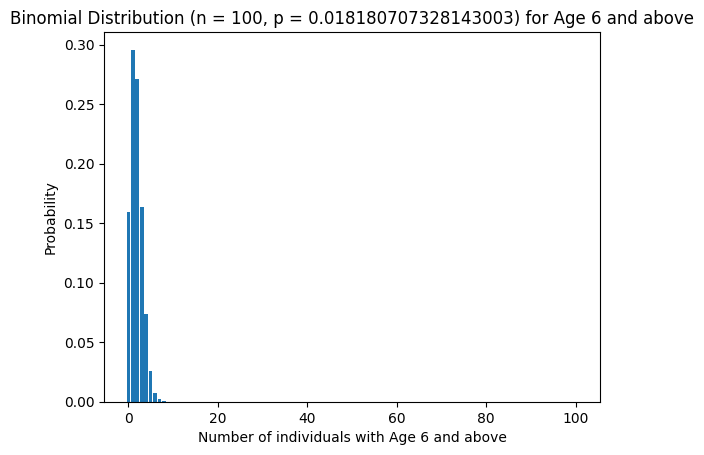

In [215]:

filtered_data_age = df[(df['Diabetes'] == 1 ) & (df['Age'] >= 6)]
count_age = filtered_data_age.count()
# Define parameters
n = 100  # Total number of individuals (trials)
p_age = len(filtered_data_age)/len(df) # probability
# Generate range of values for x (number of individuals in specified BMI category)
x_values = np.arange(0, n+1)

# Calculate probabilities using binomial distribution
pmf = binom.pmf(x_values, n, p_age)
# Plot the binomial distribution
plt.bar(x_values, pmf)
plt.xlabel('Number of individuals with Age 6 and above')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, p = {p_age}) for Age 6 and above')
plt.show()

hlthCareVal = df[(df['AnyHealthcare'] == 0)]
hlthCareNum = hlthCareVal.count()

<p>These results informs us that ordinal categories have a lower probability of being at risk for diabetes. This is showcased by the fact that the graphs are skewed to the right and probabilities are less than 0.5 Although the probabilities of the ordinal features are significantly lower then the categorical features, that isn't the result of the two features inherent properties but rather it is the result of the individual features indicating their correlation towards being at risk of diabetes. From this we can use theese features in conjuction with others to determine a person risk to diabetes rather than looking at the features solely indepedndetly. For instance a person of low age and high cholesterol will most likley be at risk for Diabetes at is considered out of the norm to have thoose characterstics. </p>


<h3>Binomial Distribution Diabetic Risk</h3>

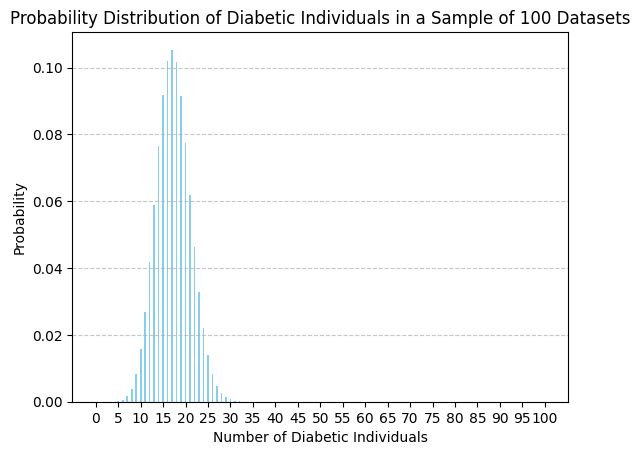

In [216]:
# Parameters
n = 100  # Total number of datasets in the sample
p = df['Diabetes'].mean()  # Probability of having diabetes in the original dataset

# Calculate the probabilities for each number of diabetic individuals
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
a = pmf.sum()
# Plot the probability distribution
plt.bar(x, pmf, color='skyblue', width=0.4)
plt.xlabel('Number of Diabetic Individuals')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Diabetic Individuals in a Sample of {n} Datasets')
plt.xticks(np.arange(0, n+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p> From the probabilities we can observe that the distribution is skewed to right and it is more likely to have fewer diabetic individuals then more. Additional the probability decreases significantly as the number of diabetic individuals in the sample increases.</p>

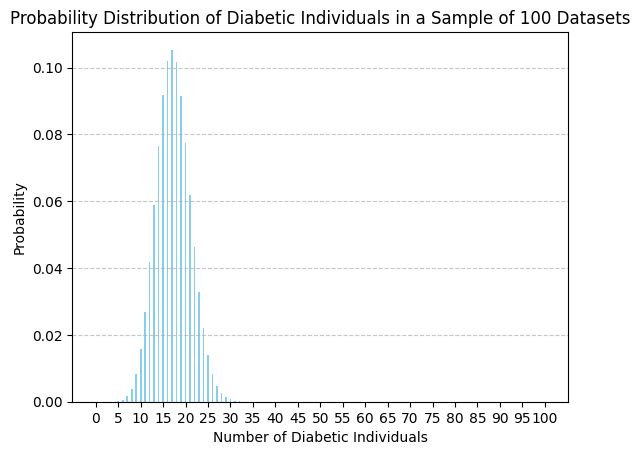

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 100  # Total number of datasets in the sample
p = df['Diabetes'].mean()  # Probability of having diabetes in the original dataset

# Calculate the probabilities for each number of diabetic individuals
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
a = pmf.sum()
# Plot the probability distribution
plt.bar(x, pmf, color='skyblue', width=0.4)
plt.xlabel('Number of Diabetic Individuals')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Diabetic Individuals in a Sample of {n} Datasets')
plt.xticks(np.arange(0, n+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p> From the probabilities we can observe that the distribution is skewed to right and it is more likely to have fewer diabetic individuals then more. Additional the probability decreases significantly as the number of diabetic individuals in the sample increases.</p>